In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
import mplcursors

file_path_per_cycle = '/home/mremington/Documents/uumarrty_exps/owl_exp/exp1/Data/per_cycle.csv'
file_path_parameter = '/home/mremington/Documents/uumarrty_exps/owl_exp/exp1/Data/parameters.csv'
per_cycle = pd.read_csv(file_path_per_cycle,header = 0, index_col=None)
parameters = pd.read_csv(file_path_parameter,header = 0, index_col=None)
sim = per_cycle[per_cycle['sim_number']==0]
sim = sim[sim['experiment']=='experiment1']
sim_krat = sim[sim['org']=='krat']
sim_snake = sim[sim['org']=='snake']

#### EXP 2 ######
file_path_per_cycle_exp2 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp2/Data/per_cycle.csv'
file_path_parameter_exp2 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp2/Data/parameters.csv'
per_cycle_exp2 = pd.read_csv(file_path_per_cycle_exp2,header = 0, index_col=None)
parameters_exp2 = pd.read_csv(file_path_parameter_exp2,header = 0, index_col=None)
sim_exp2 = per_cycle_exp2[per_cycle_exp2['sim_number']==0]
sim_exp2 = sim_exp2[sim_exp2['experiment']=='experiment2']
sim_krat_exp2 = sim_exp2[sim_exp2['org']=='krat']
sim_snake_exp2 = sim_exp2[sim_exp2['org']=='snake']

#### EXP 3 ######
file_path_per_cycle_exp3 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp3/Data/per_cycle.csv'
file_path_parameter_exp3 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp3/Data/parameters.csv'
per_cycle_exp3 = pd.read_csv(file_path_per_cycle_exp3,header = 0, index_col=None)
parameters_exp3 = pd.read_csv(file_path_parameter_exp3,header = 0, index_col=None)
sim_exp3 = per_cycle_exp3[per_cycle_exp3['sim_number']==0]
sim_exp3 = sim_exp3[sim_exp3['experiment']=='experiment3']
sim_krat_exp3 = sim_exp3[sim_exp3['org']=='krat']
sim_snake_exp3 = sim_exp3[sim_exp3['org']=='snake']

#### EXP 4 ######
file_path_per_cycle_exp4 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp4/Data/per_cycle.csv'
file_path_parameter_exp4 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp4/Data/parameters.csv'
per_cycle_exp4 = pd.read_csv(file_path_per_cycle_exp4,header = 0, index_col=None)
parameters_exp4 = pd.read_csv(file_path_parameter_exp4,header = 0, index_col=None)
sim_exp4 = per_cycle_exp4[per_cycle_exp4['sim_number']==0]
sim_exp4 = sim_exp4[sim_exp4['experiment']=='experiment4']
sim_krat_exp4 = sim_exp4[sim_exp4['org']=='krat']
sim_snake_exp4 = sim_exp4[sim_exp4['org']=='snake']

#### EXP 5 ######
file_path_per_cycle_exp5 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp5/Data/per_cycle.csv'
file_path_parameter_exp5 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp5/Data/parameters.csv'
per_cycle_exp5 = pd.read_csv(file_path_per_cycle_exp5,header = 0, index_col=None)
parameters_exp5 = pd.read_csv(file_path_parameter_exp5,header = 0, index_col=None)
sim_exp5 = per_cycle_exp5[per_cycle_exp5['sim_number']==0]
sim_exp5 = sim_exp5[sim_exp5['experiment']=='experiment5']
sim_krat_exp5 = sim_exp5[sim_exp5['org']=='krat']
sim_snake_exp5 = sim_exp5[sim_exp5['org']=='snake']

#### EXP 6 ######
file_path_per_cycle_exp6 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp6/Data/per_cycle.csv'
file_path_parameter_exp6 = '/home/mremington/Documents/uumarrty_exps/mixed_owl_exp/exp6/Data/parameters.csv'
per_cycle_exp6 = pd.read_csv(file_path_per_cycle_exp6,header = 0, index_col=None)
parameters_exp6 = pd.read_csv(file_path_parameter_exp6,header = 0, index_col=None)
sim_exp6 = per_cycle_exp6[per_cycle_exp6['sim_number']==0]
sim_exp6 = sim_exp6[sim_exp6['experiment']=='experiment6']
sim_krat_exp6 = sim_exp6[sim_exp6['org']=='krat']
sim_snake_exp6 = sim_exp6[sim_exp6['org']=='snake']

####################
## Derivative aprox
####################

def aprox_derv_forward(data,step_size):
    derv = []
    for i in range(len(data)-step_size):
        val = round(((data[i+step_size]-data[i])/step_size),2)
        derv.append(val)
    return derv

def aprox_derv_backward(data,step_size):
    derv = []
    for i in range(len(data)):
        val = (data[i]-data[i-step_size])/step_size
        derv.append(val)
    return derv

def aprox_derv_central(data,step_size_forward,step_size_backward):
    derv = []
    if step_size_backward<0:
        raise ValueError()
    for i in range(len(data)):
        try:
            if i-step_size_backward<0:
                val = float("NAN")
            else:
                val = (data[i+step_size_forward]-data[i-step_size_backward])/(step_size_forward+step_size_backward)
        except IndexError:
            val = float("NAN")
        derv.append(val)
    return derv

def aprox_derv_forward_v2(data,step_size):
    return np.diff(data,1)/step_size

In [2]:
krat_reproduction_freq = parameters['krat_reproduction_freq_per_x_cycles'].max()
snake_reproduction_freq = parameters['snake_reproduction_freq_per_x_cycles'].max()
krat_reproduction_freq_exp2 = parameters_exp2['krat_reproduction_freq_per_x_cycles'].max()
snake_reproduction_freq_exp2 = parameters_exp2['snake_reproduction_freq_per_x_cycles'].max()
krat_reproduction_freq_exp3 = parameters_exp3['krat_reproduction_freq_per_x_cycles'].max()
snake_reproduction_freq_exp3 = parameters_exp3['snake_reproduction_freq_per_x_cycles'].max()
krat_reproduction_freq_exp4 = parameters_exp4['krat_reproduction_freq_per_x_cycles'].max()
snake_reproduction_freq_exp4 = parameters_exp4['snake_reproduction_freq_per_x_cycles'].max()
krat_reproduction_freq_exp5 = parameters_exp5['krat_reproduction_freq_per_x_cycles'].max()
snake_reproduction_freq_exp5 = parameters_exp5['snake_reproduction_freq_per_x_cycles'].max()
krat_reproduction_freq_exp6 = parameters_exp6['krat_reproduction_freq_per_x_cycles'].max()
snake_reproduction_freq_exp6 = parameters_exp6['snake_reproduction_freq_per_x_cycles'].max()

In [3]:
rolling_mean_window_size = 3
#exp1
krat_by_gen = sim_krat[sim_krat.apply(lambda sim_krat: (sim_krat['cycle'] % krat_reproduction_freq)==0, axis=1)]
krat_by_gen['bush_pw_ma']=krat_by_gen['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
snake_by_gen = sim_snake[sim_snake.apply(lambda sim_snake: (sim_snake['cycle'] % snake_reproduction_freq)==0, axis=1)]
snake_by_gen['bush_pw_ma']=snake_by_gen['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
#exp2
krat_by_gen_exp2 = sim_krat_exp2[sim_krat_exp2.apply(lambda sim_krat_exp2: (sim_krat_exp2['cycle'] % krat_reproduction_freq_exp2)==0, axis=1)]
krat_by_gen_exp2['bush_pw_ma']=krat_by_gen_exp2['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
snake_by_gen_exp2 = sim_snake_exp2[sim_snake_exp2.apply(lambda sim_snake_exp2: (sim_snake_exp2['cycle'] % snake_reproduction_freq_exp2)==0, axis=1)]
snake_by_gen_exp2['bush_pw_ma']=snake_by_gen_exp2['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
#exp3
krat_by_gen_exp3 = sim_krat_exp3[sim_krat_exp3.apply(lambda sim_krat_exp3: (sim_krat_exp3['cycle'] % krat_reproduction_freq_exp3)==0, axis=1)]
krat_by_gen_exp3['bush_pw_ma']=krat_by_gen_exp3['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
snake_by_gen_exp3 = sim_snake_exp3[sim_snake_exp3.apply(lambda sim_snake_exp3: (sim_snake_exp3['cycle'] % snake_reproduction_freq_exp3)==0, axis=1)]
snake_by_gen_exp3['bush_pw_ma']=snake_by_gen_exp3['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
#exp4
krat_by_gen_exp4 = sim_krat_exp4[sim_krat_exp4.apply(lambda sim_krat_exp4: (sim_krat_exp4['cycle'] % krat_reproduction_freq_exp4)==0, axis=1)]
krat_by_gen_exp4['bush_pw_ma']=krat_by_gen_exp4['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
snake_by_gen_exp4 = sim_snake_exp4[sim_snake_exp4.apply(lambda sim_snake_exp4: (sim_snake_exp3['cycle'] % snake_reproduction_freq_exp4)==0, axis=1)]
snake_by_gen_exp4['bush_pw_ma']=snake_by_gen_exp4['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
#exp5
krat_by_gen_exp5 = sim_krat_exp4[sim_krat_exp5.apply(lambda sim_krat_exp5: (sim_krat_exp5['cycle'] % krat_reproduction_freq_exp5)==0, axis=1)]
krat_by_gen_exp5['bush_pw_ma']=krat_by_gen_exp5['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
snake_by_gen_exp5 = sim_snake_exp5[sim_snake_exp5.apply(lambda sim_snake_exp5: (sim_snake_exp3['cycle'] % snake_reproduction_freq_exp5)==0, axis=1)]
snake_by_gen_exp5['bush_pw_ma']=snake_by_gen_exp5['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()

<ipython-input-3-b69445bec772>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snake_by_gen['bush_pw_ma']=snake_by_gen['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
<ipython-input-3-b69445bec772>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snake_by_gen_exp2['bush_pw_ma']=snake_by_gen_exp2['bush_pw_mean'].rolling(window=rolling_mean_window_size,center=False).mean()
<ipython-input-3-b69445bec772>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [17]:
per_cycle_groupings = per_cycle.groupby(['sim_id','org'])
for name, group in per_cycle_groupings:
    print(group['org'].max())
    break

krat


Text(0.5, 1.0, 'Snake: EXP 1')

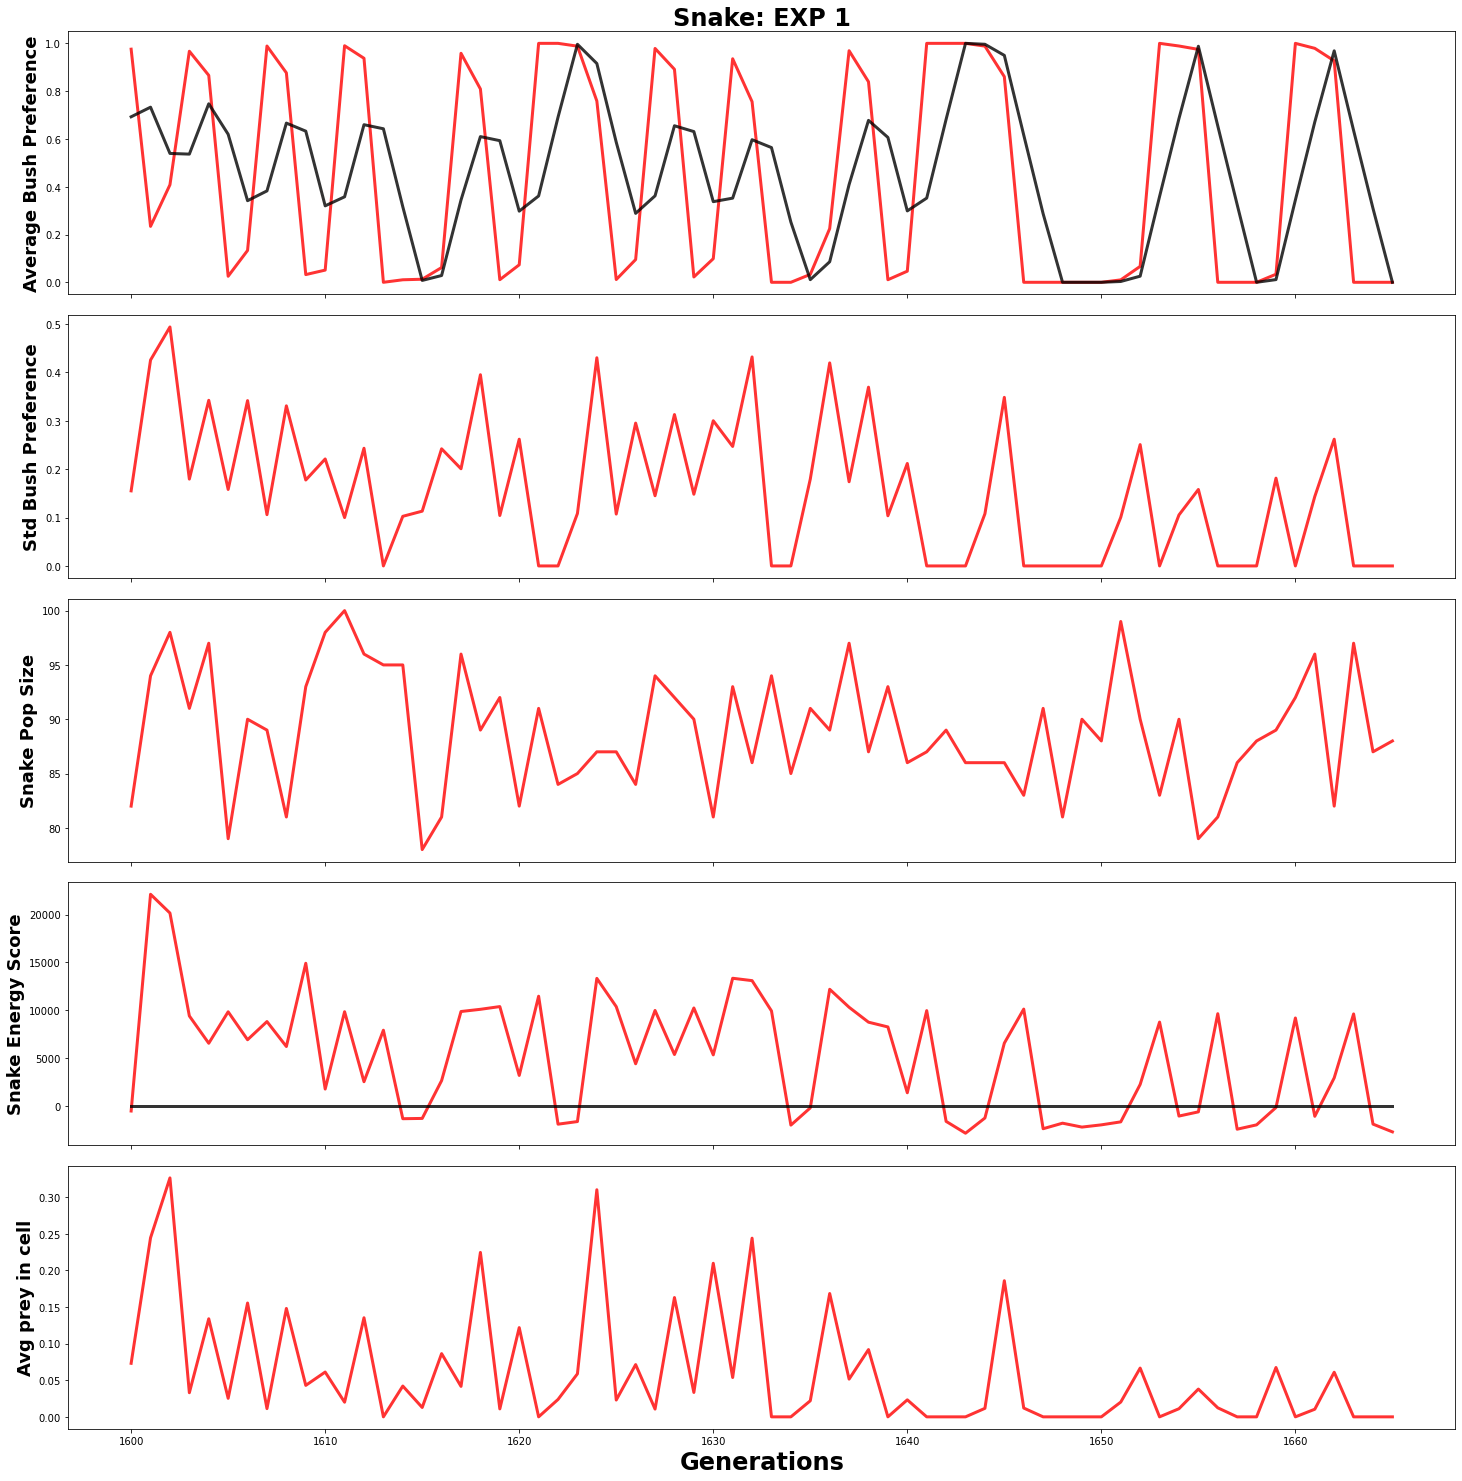

In [27]:
### EXP 1: Snake ######
snake_gen_temp = snake_by_gen[snake_by_gen['generation']>=1600]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig, axs = plt.subplots(5, sharex=True, figsize=(20,20))
fig.tight_layout()
#fig.rcParams["figure.figsize"] = (18,8)
axs[0].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_mean"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_ma"],'black', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].set_ylabel("Average Bush Preference", fontsize=18, weight = 'bold')
axs[1].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_std"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[1].set_ylabel("Std Bush Preference", fontsize=18, weight = 'bold')
axs[2].plot(snake_gen_temp['generation'], snake_gen_temp["pop_count"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_ylabel("Snake Pop Size", fontsize=18, weight = 'bold')
axs[3].plot(snake_gen_temp['generation'], snake_gen_temp["energy_score_mean"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[3].plot(snake_gen_temp['generation'], [0 for i in range(0,len(snake_gen_temp))],'black', linewidth=3, alpha=0.8)
axs[3].set_ylabel("Snake Energy Score", fontsize=18, weight = 'bold')
axs[4].plot(snake_gen_temp['generation'], snake_gen_temp["other_in_cell_mean"],'red', linewidth=3, alpha=0.8)
axs[4].set_ylabel("Avg prey in cell", fontsize=18, weight = 'bold')
axs[4].set_xlabel("Generations", fontsize=24, weight = 'bold')
axs[0].set_title('Snake: EXP 1', fontsize=24, weight = 'bold')

#ax.set_ylabel("Average Bush Preference", fontsize=24, weight = 'bold')
#ax.set_title("Average Habitat Usage Preference Per Generation", fontsize=26, weight = 'bold')


Text(0.5, 1.0, 'Snake: EXP 2')

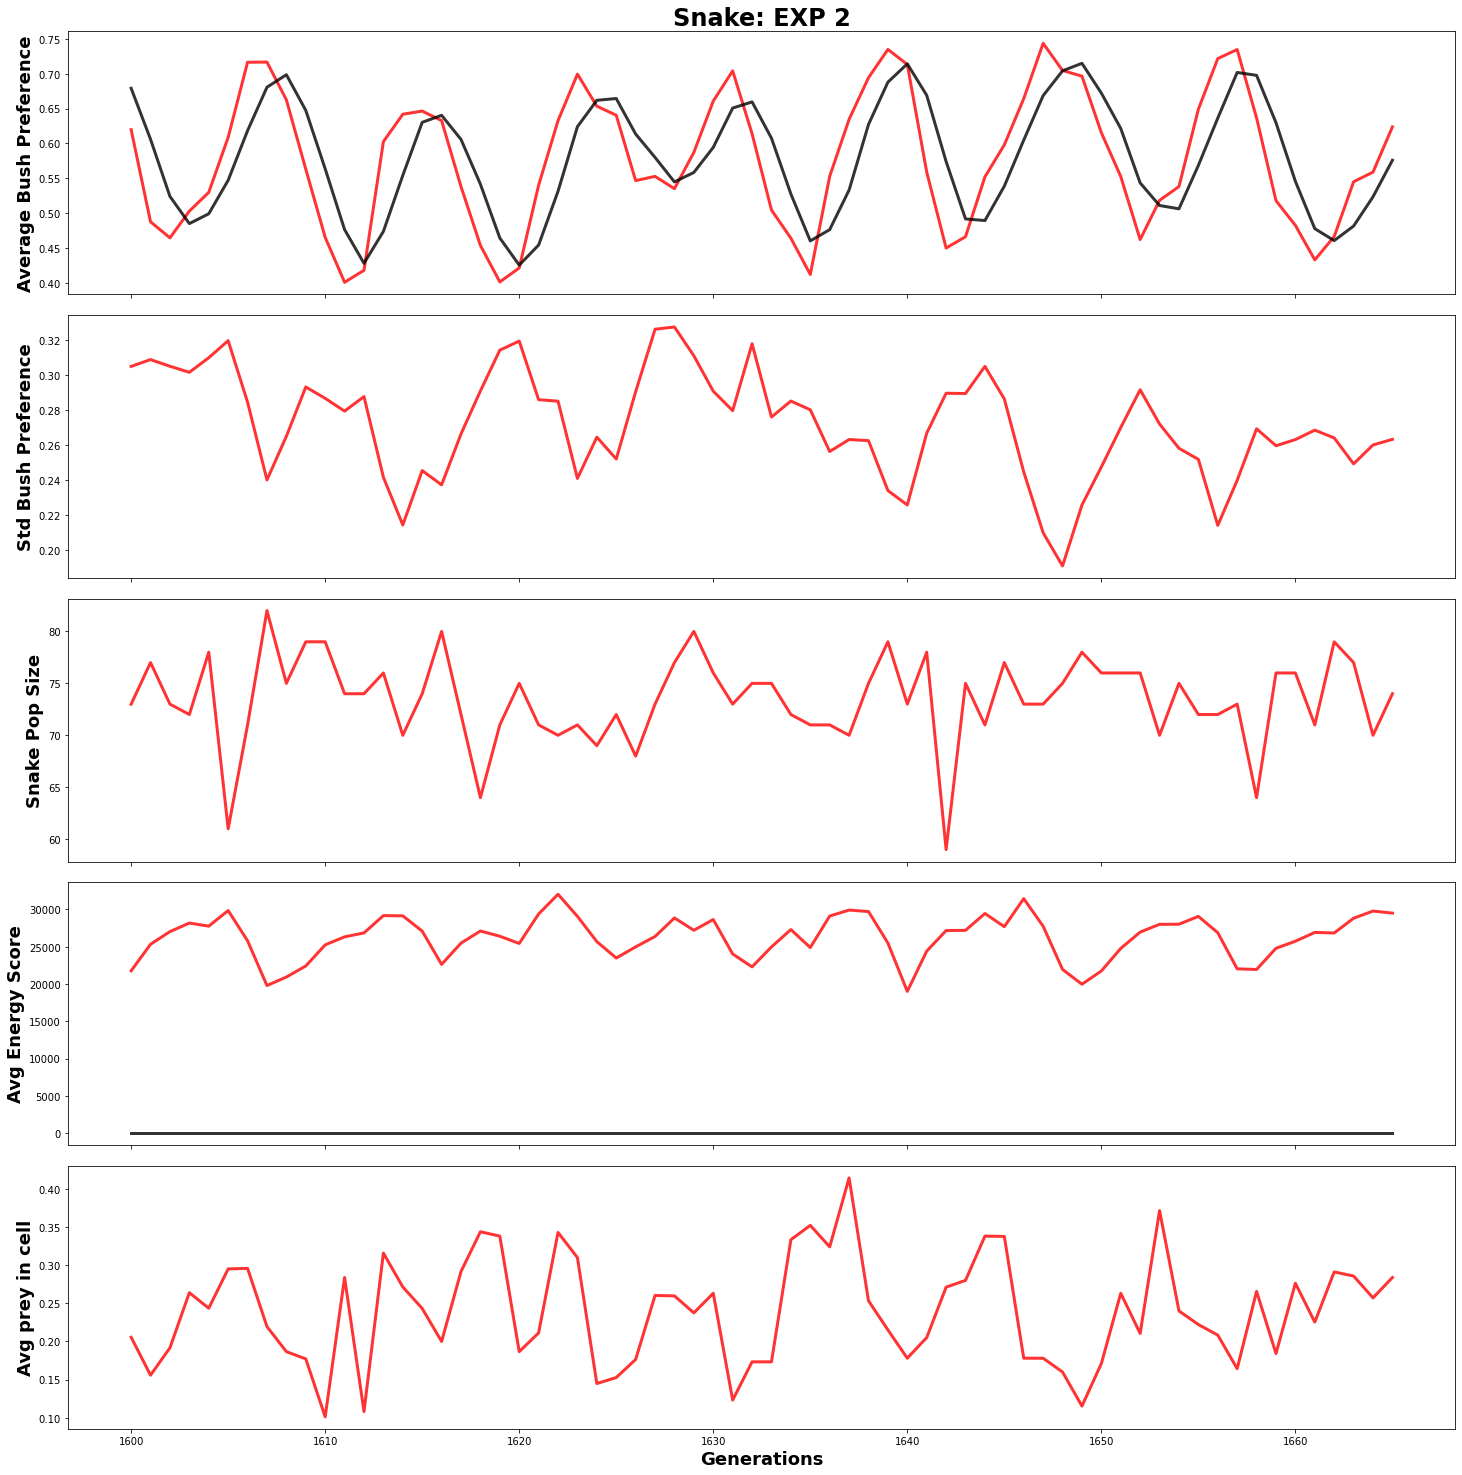

In [28]:
### EXP 2: Snake ######
snake_gen_temp = snake_by_gen_exp2[snake_by_gen_exp2['generation']>=1600]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,        'lines.markersize' : 10,

        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig, axs = plt.subplots(5, sharex=True, figsize=(20,20))
fig.tight_layout()
#fig.rcParams["figure.figsize"] = (18,8)
axs[0].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_mean"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_ma"],'black', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].set_ylabel("Average Bush Preference", fontsize=18, weight = 'bold')
axs[1].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_std"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[1].set_ylabel("Std Bush Preference", fontsize=18, weight = 'bold')
axs[2].plot(snake_gen_temp['generation'], snake_gen_temp["pop_count"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_ylabel("Snake Pop Size", fontsize=18, weight = 'bold')
axs[3].plot(snake_gen_temp['generation'], snake_gen_temp["energy_score_mean"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[3].plot(snake_gen_temp['generation'], [0 for i in range(0,len(snake_gen_temp))],'black', linewidth=3, alpha=0.8)
axs[3].set_ylabel("Avg Energy Score", fontsize=18, weight = 'bold')
axs[4].plot(snake_gen_temp['generation'], snake_gen_temp["other_in_cell_mean"],'red', linewidth=3, alpha=0.8)
axs[4].set_ylabel("Avg prey in cell", fontsize=18, weight = 'bold')
axs[4].set_xlabel("Generations", fontsize=18, weight = 'bold')
axs[0].set_title('Snake: EXP 2', fontsize=24, weight = 'bold')

Text(0.5, 1.0, 'Snake: EXP 3')

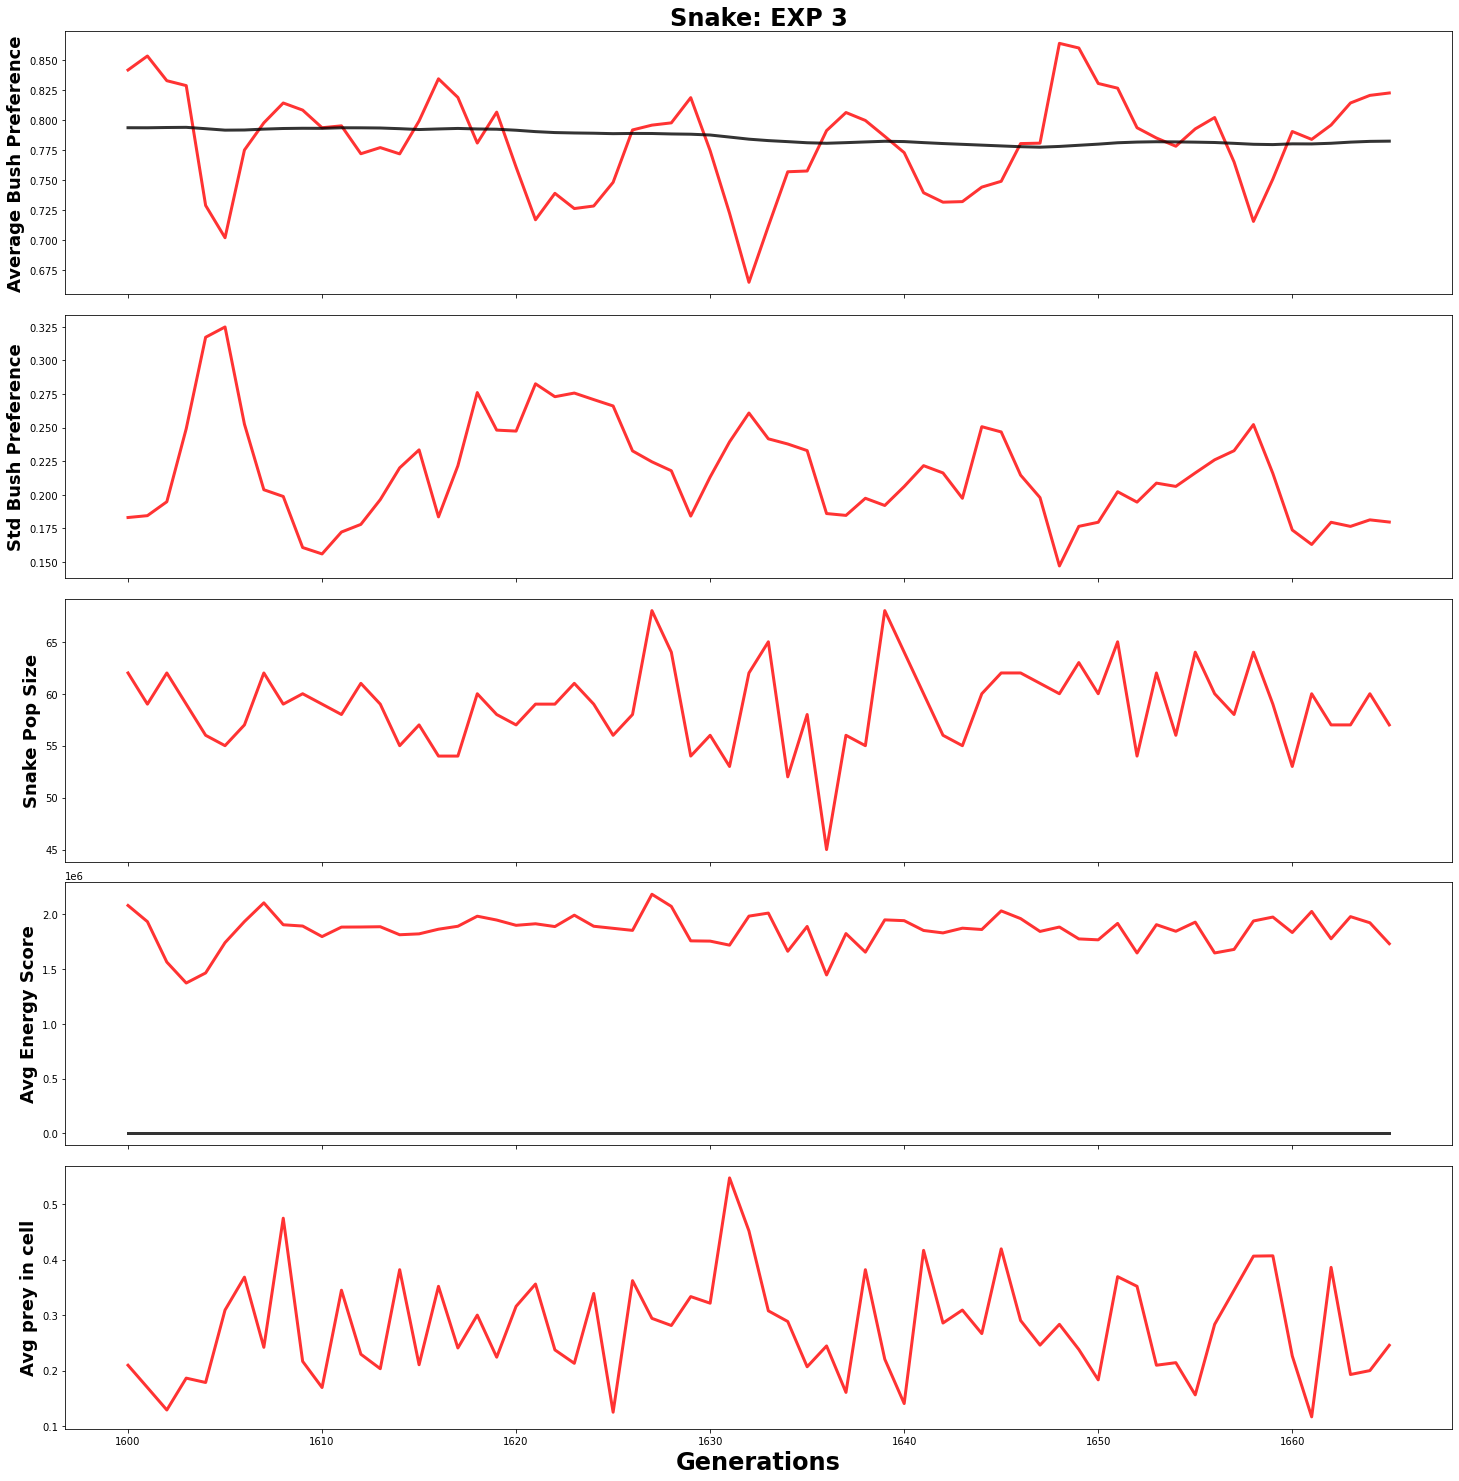

In [26]:
### EXP 3: Snake ######
snake_gen_temp = snake_by_gen_exp3[snake_by_gen_exp3['generation']>=1600]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig, axs = plt.subplots(5, sharex=True, figsize=(20,20))
fig.tight_layout()
axs[0].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_mean"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_ma"],'black', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].set_ylabel("Average Bush Preference", fontsize=18, weight = 'bold')
axs[1].plot(snake_gen_temp['generation'], snake_gen_temp["bush_pw_std"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[1].set_ylabel("Std Bush Preference", fontsize=18, weight = 'bold')
axs[2].plot(snake_gen_temp['generation'], snake_gen_temp["pop_count"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_ylabel("Snake Pop Size", fontsize=18, weight = 'bold')
axs[3].plot(snake_gen_temp['generation'], snake_gen_temp["energy_score_sum"],'red', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[3].plot(snake_gen_temp['generation'], [0 for i in range(0,len(snake_gen_temp))],'black', linewidth=3, alpha=0.8)
axs[3].set_ylabel("Avg Energy Score", fontsize=18, weight = 'bold')
axs[4].plot(snake_gen_temp['generation'], snake_gen_temp["other_in_cell_mean"],'red', linewidth=3, alpha=0.8)
axs[4].set_ylabel("Avg prey in cell", fontsize=18, weight = 'bold')
axs[4].set_xlabel("Generations", fontsize=24, weight = 'bold')
axs[0].set_title('Snake: EXP 3', fontsize=24, weight = 'bold')


Text(0.5, 1.0, 'Krat: EXP 1')

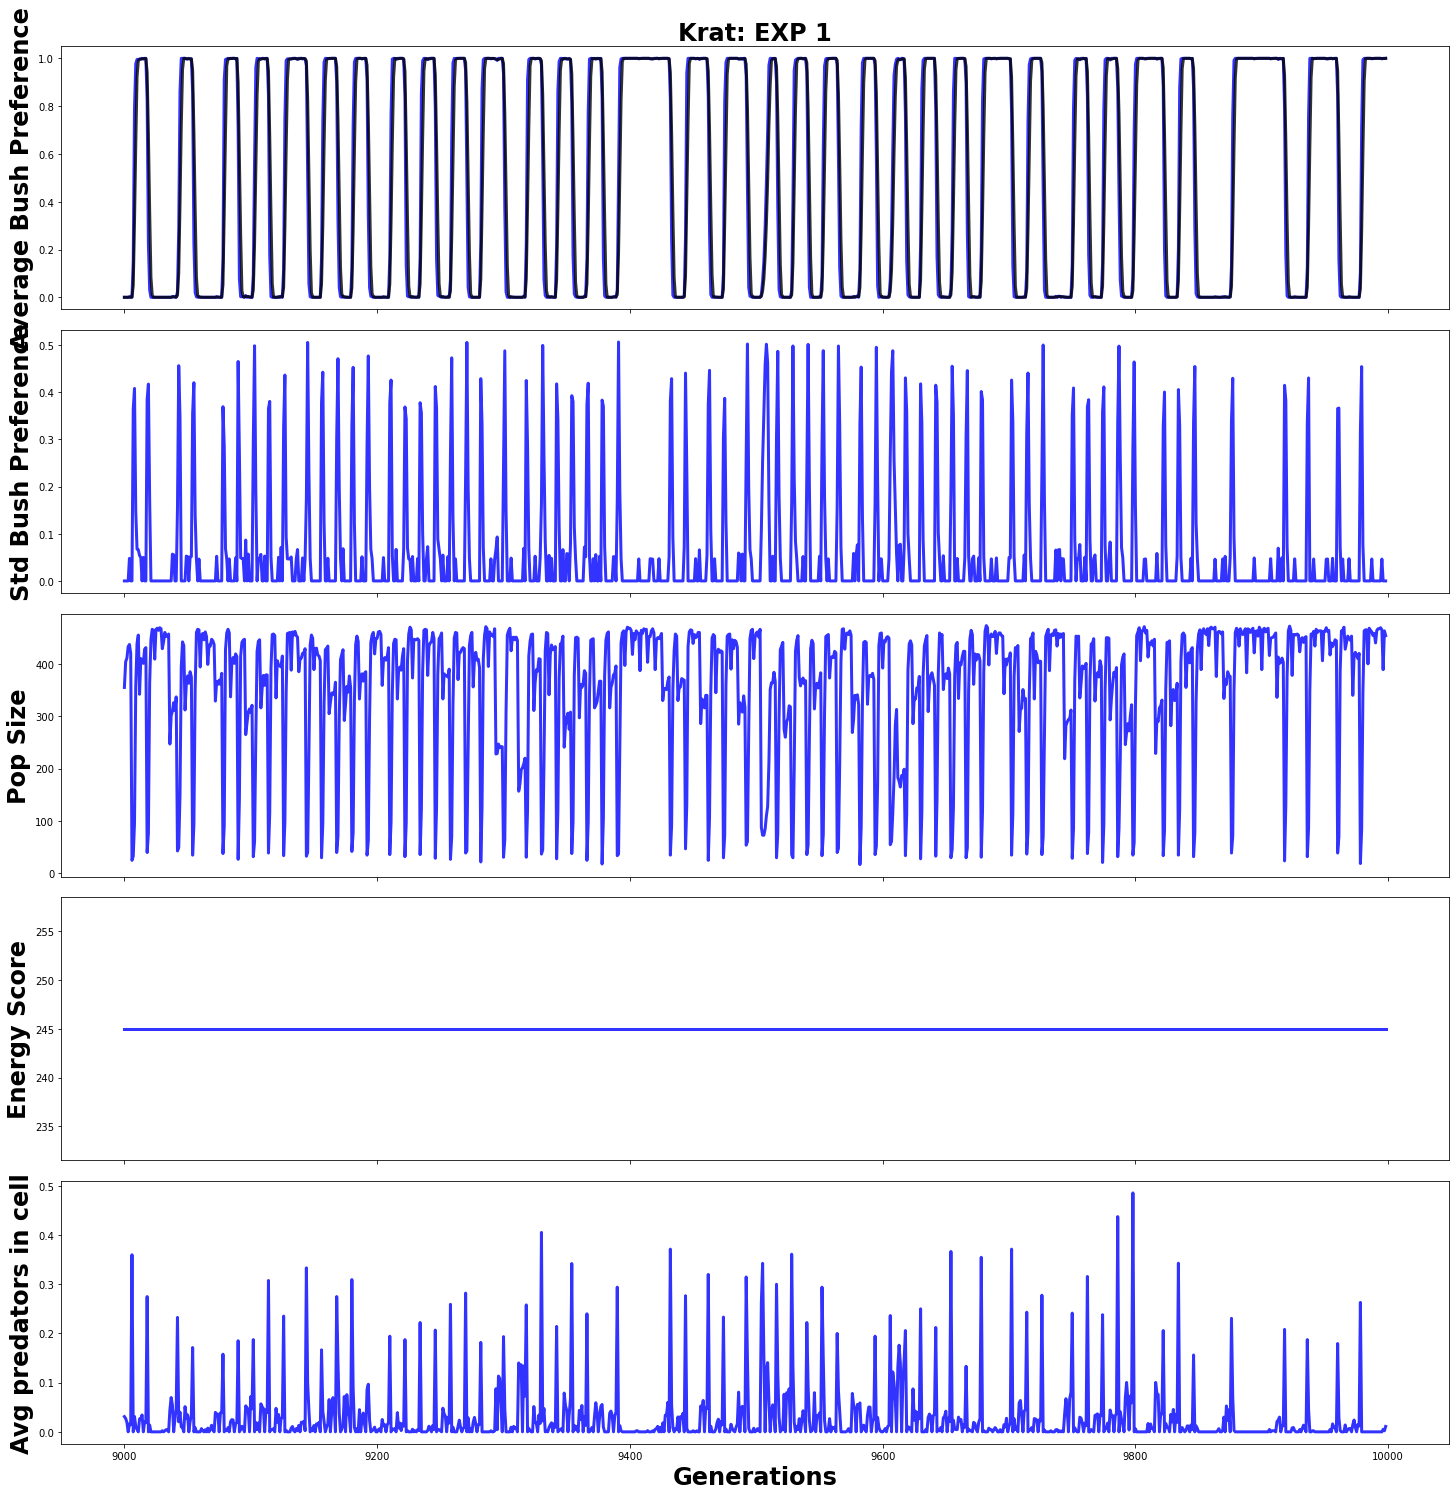

In [29]:
krat_gen_temp = krat_by_gen[krat_by_gen['generation']>=9000]
#krat_by_gen[krat_by_gen['generation']>=1600]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig, axs = plt.subplots(5, sharex=True, figsize=(20,20))
fig.tight_layout()
#fig.rcParams["figure.figsize"] = (18,8)
axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_ma"],'black', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].set_ylabel("Average Bush Preference", fontsize=24, weight = 'bold')
axs[1].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_std"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[1].set_ylabel("Std Bush Preference", fontsize=24, weight = 'bold')
axs[2].plot(krat_gen_temp['generation'], krat_gen_temp["pop_count"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_ylabel("Pop Size", fontsize=24, weight = 'bold')
axs[3].plot(krat_gen_temp['generation'], krat_gen_temp["energy_score_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
#axs[3].plot(krat_gen_temp['generation'], [0 for i in range(0,len(krat_gen_temp))],'black', linewidth=3, alpha=0.8)
axs[3].set_ylabel("Energy Score", fontsize=24, weight = 'bold')
axs[4].plot(krat_gen_temp['generation'], krat_gen_temp["other_in_cell_mean"],'blue', linewidth=3, alpha=0.8)
axs[4].set_ylabel("Avg predators in cell", fontsize=24, weight = 'bold')
axs[4].set_xlabel("Generations", fontsize=24, weight = 'bold')
axs[0].set_title('Krat: EXP 1', fontsize=24, weight = 'bold')

#ax.set_ylabel("Average Bush Preference", fontsize=24, weight = 'bold')
#ax.set_title("Average Habitat Usage Preference Per Generation", fontsize=26, weight = 'bold')
#lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

Text(0.5, 1.0, 'Krat: EXP 2')

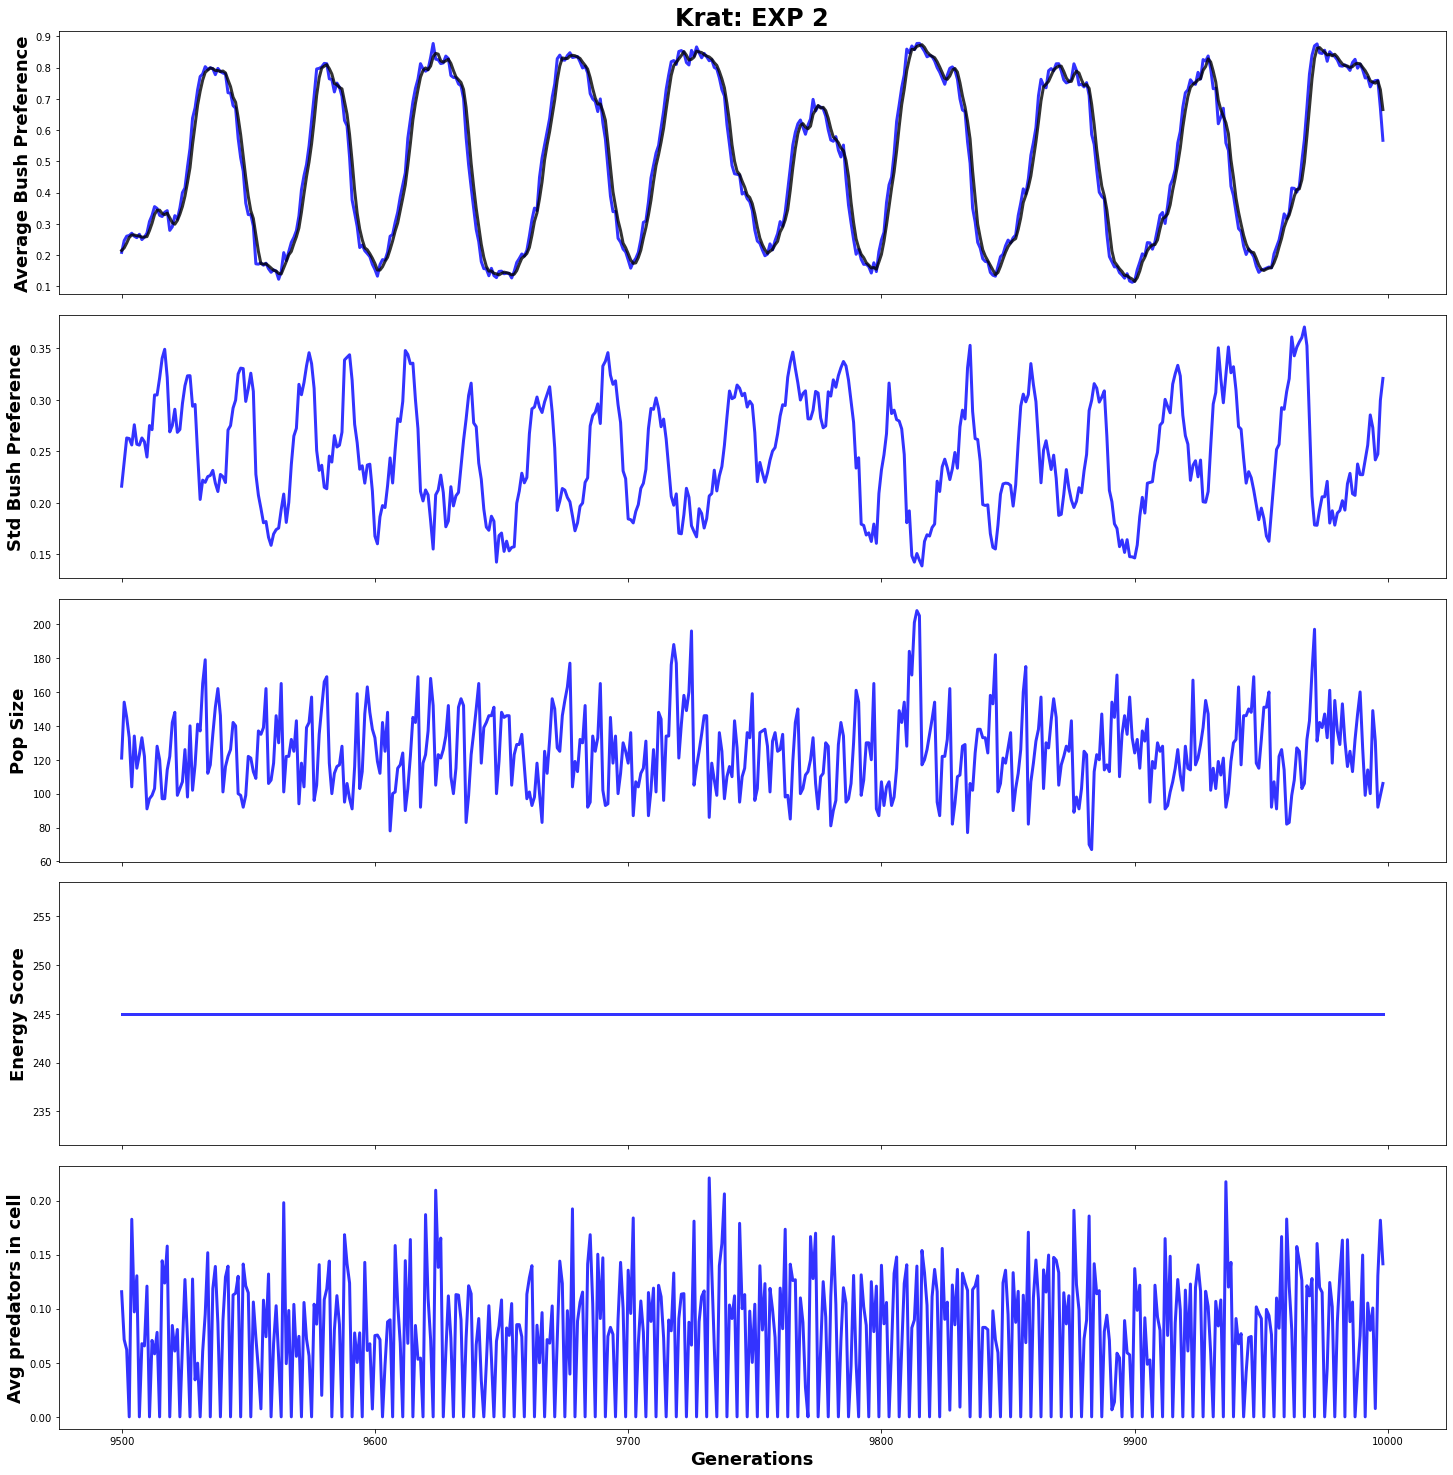

In [30]:
krat_gen_temp = krat_by_gen_exp2[krat_by_gen_exp2['generation']>=9500]
#krat_by_gen[krat_by_gen['generation']>=1600]

fig, axs = plt.subplots(5, sharex=True, figsize=(20,20))
fig.tight_layout()
#fig.rcParams["figure.figsize"] = (18,8)
axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_ma"],'black', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].set_ylabel("Average Bush Preference", fontsize=18, weight = 'bold')
axs[1].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_std"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[1].set_ylabel("Std Bush Preference", fontsize=18, weight = 'bold')
axs[2].plot(krat_gen_temp['generation'], krat_gen_temp["pop_count"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_ylabel("Pop Size", fontsize=18, weight = 'bold')
axs[3].plot(krat_gen_temp['generation'], krat_gen_temp["energy_score_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
#axs[3].plot(krat_gen_temp['generation'], [0 for i in range(0,len(krat_gen_temp))],'black', linewidth=3, alpha=0.8)
axs[3].set_ylabel("Energy Score", fontsize=18, weight = 'bold')
axs[4].plot(krat_gen_temp['generation'], krat_gen_temp["other_in_cell_mean"],'blue', linewidth=3, alpha=0.8)
axs[4].set_ylabel("Avg predators in cell", fontsize=18, weight = 'bold')
axs[4].set_xlabel("Generations", fontsize=18, weight = 'bold')
axs[0].set_title('Krat: EXP 2', fontsize=24, weight = 'bold')
#ax.set_ylabel("Average Bush Preference", fontsize=18, weight = 'bold')
#ax.set_title("Average Habitat Usage Preference Per Generation", fontsize=26, weight = 'bold')
#lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

Text(0.5, 1.0, 'Krat: EXP 3')

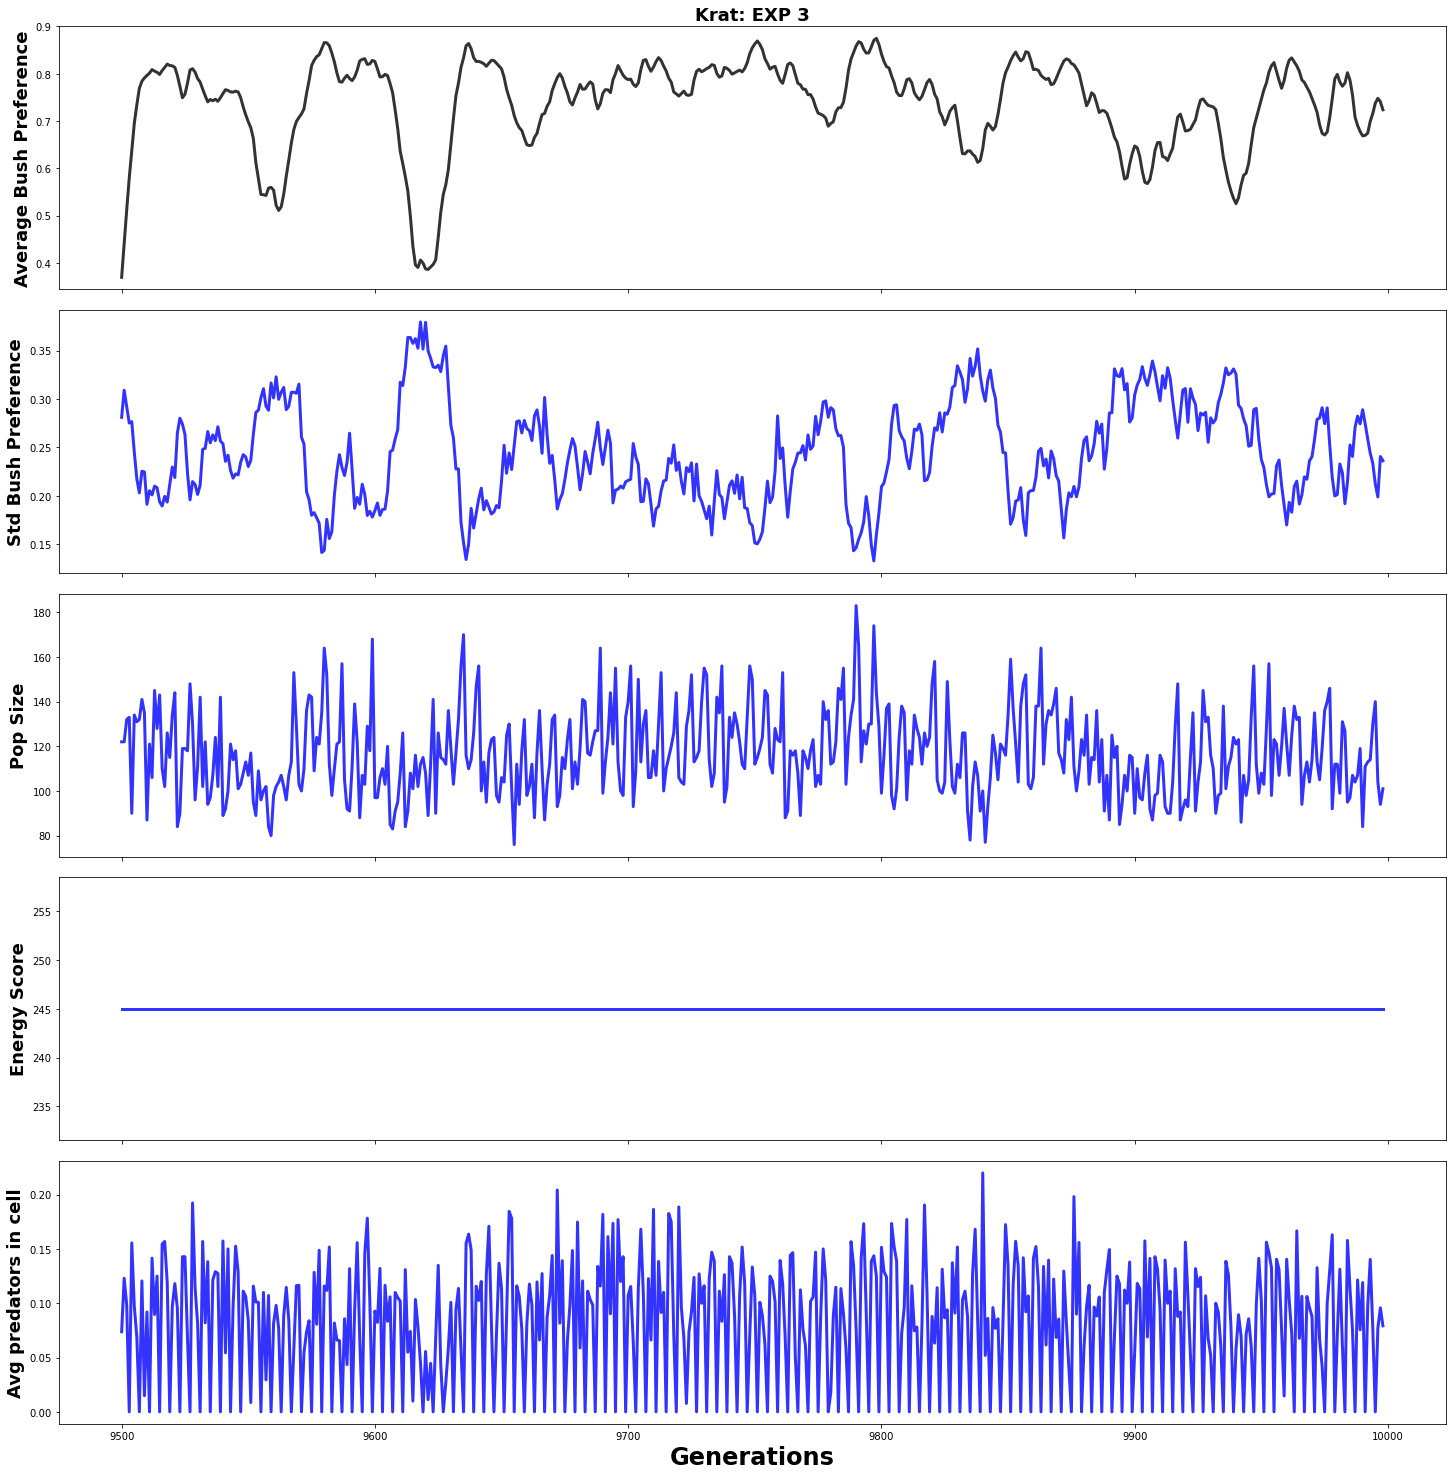

In [5]:
krat_gen_temp = krat_by_gen_exp3[krat_by_gen_exp3['generation']>=9500]
#krat_by_gen[krat_by_gen['generation']>=1600]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig, axs = plt.subplots(5, sharex=True, figsize=(20,20))
fig.tight_layout()
#fig.rcParams["figure.figsize"] = (18,8)
#axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_ma"],'black', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].set_ylabel("Average Bush Preference", fontsize=18, weight = 'bold')
axs[1].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_std"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[1].set_ylabel("Std Bush Preference", fontsize=18, weight = 'bold')
axs[2].plot(krat_gen_temp['generation'], krat_gen_temp["pop_count"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_ylabel("Pop Size", fontsize=18, weight = 'bold')
axs[3].plot(krat_gen_temp['generation'], krat_gen_temp["energy_score_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
#axs[3].plot(krat_gen_temp['generation'], [0 for i in range(0,len(krat_gen_temp))],'black', linewidth=3, alpha=0.8)
axs[3].set_ylabel("Energy Score", fontsize=18, weight = 'bold')
axs[4].plot(krat_gen_temp['generation'], krat_gen_temp["other_in_cell_mean"],'blue', linewidth=3, alpha=0.8)
axs[4].set_ylabel("Avg predators in cell", fontsize=18, weight = 'bold')
axs[4].set_xlabel("Generations", fontsize=24, weight = 'bold')
axs[0].set_title('Krat: EXP 3', fontsize=18, weight = 'bold')
#ax.set_ylabel("Average Bush Preference", fontsize=24, weight = 'bold')
#ax.set_title("Average Habitat Usage Preference Per Generation", fontsize=26, weight = 'bold')
#lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

Text(0.5, 1.0, 'Krat: EXP 3')

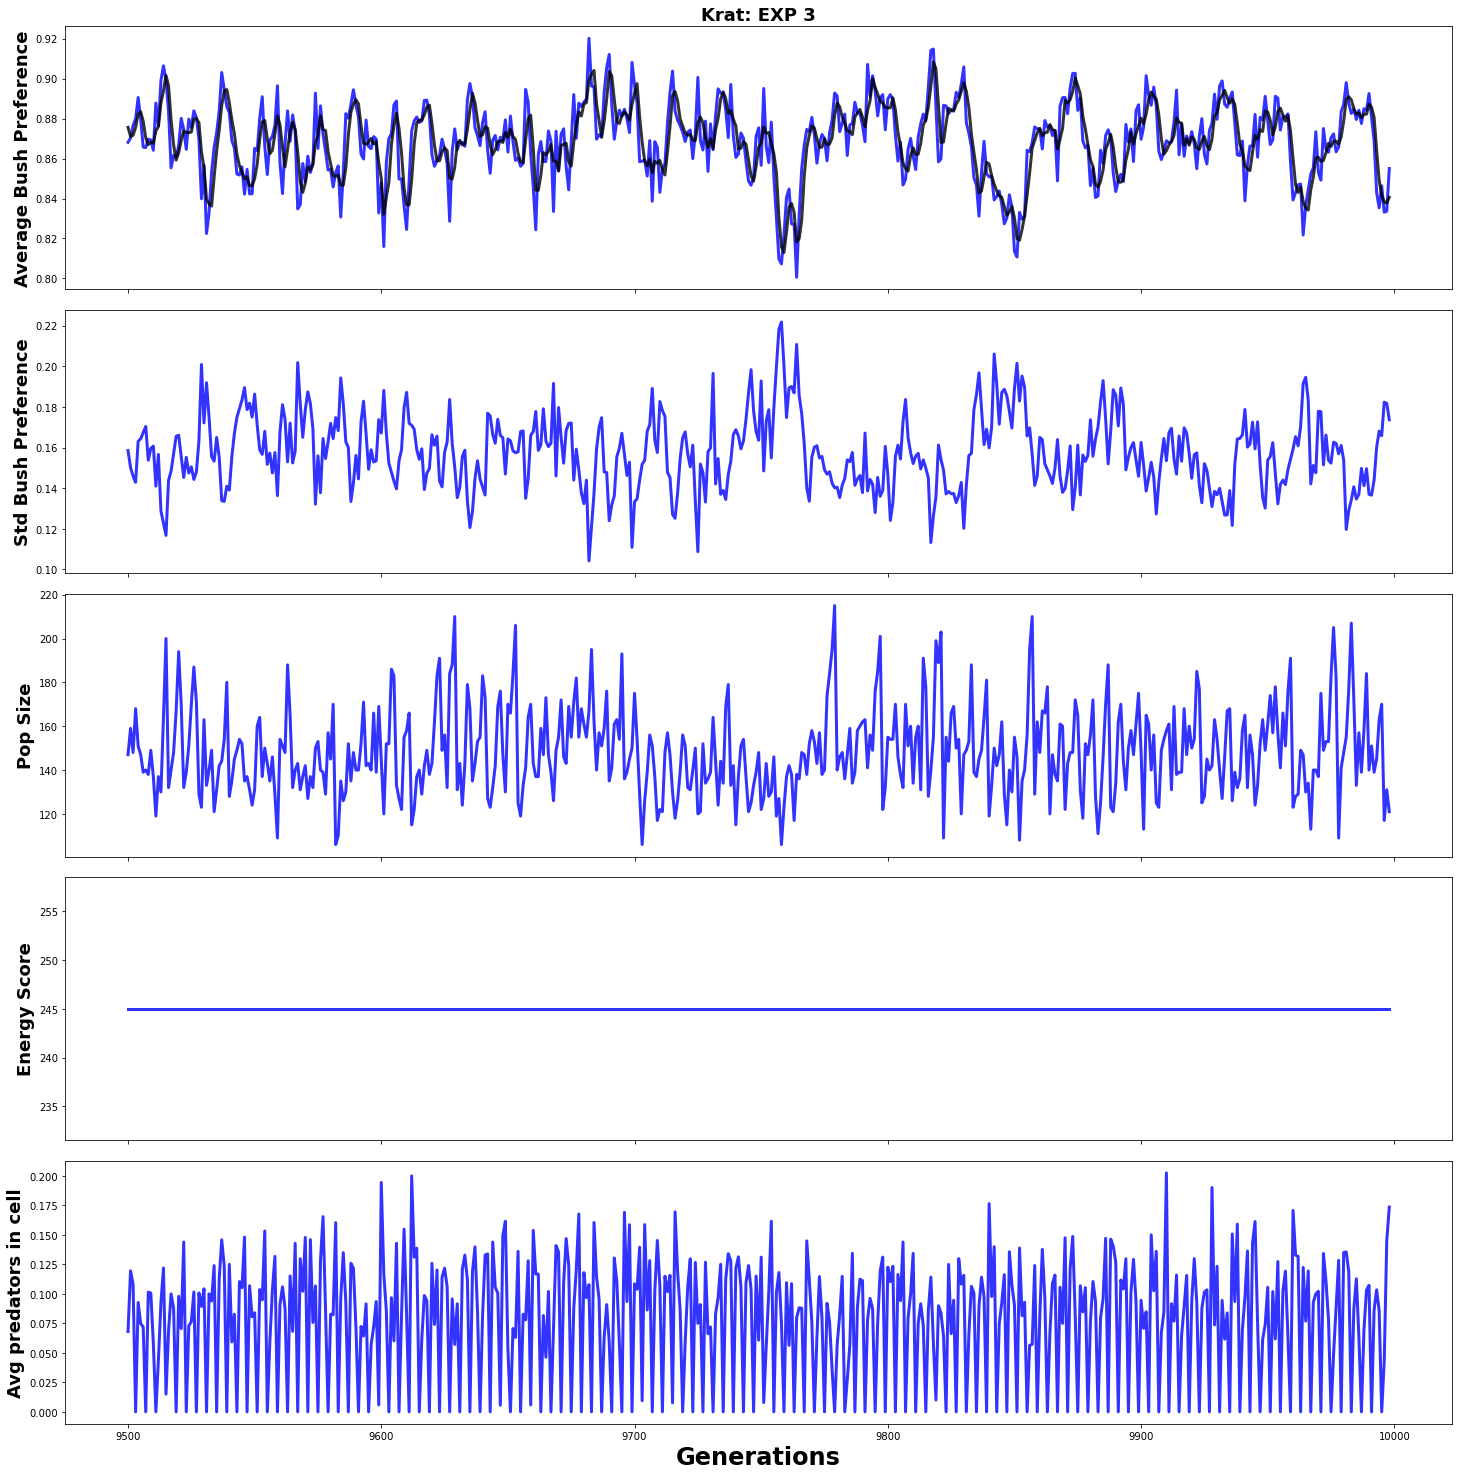

In [32]:
krat_gen_temp = krat_by_gen_exp5[krat_by_gen_exp5['generation']>=9500]
#krat_by_gen[krat_by_gen['generation']>=1600]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig, axs = plt.subplots(5, sharex=True, figsize=(20,20))
fig.tight_layout()
#fig.rcParams["figure.figsize"] = (18,8)
axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_ma"],'black', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[0].set_ylabel("Average Bush Preference", fontsize=18, weight = 'bold')
axs[1].plot(krat_gen_temp['generation'], krat_gen_temp["bush_pw_std"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[1].set_ylabel("Std Bush Preference", fontsize=18, weight = 'bold')
axs[2].plot(krat_gen_temp['generation'], krat_gen_temp["pop_count"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_ylabel("Pop Size", fontsize=18, weight = 'bold')
axs[3].plot(krat_gen_temp['generation'], krat_gen_temp["energy_score_mean"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
#axs[3].plot(krat_gen_temp['generation'], [0 for i in range(0,len(krat_gen_temp))],'black', linewidth=3, alpha=0.8)
axs[3].set_ylabel("Energy Score", fontsize=18, weight = 'bold')
axs[4].plot(krat_gen_temp['generation'], krat_gen_temp["other_in_cell_mean"],'blue', linewidth=3, alpha=0.8)
axs[4].set_ylabel("Avg predators in cell", fontsize=18, weight = 'bold')
axs[4].set_xlabel("Generations", fontsize=24, weight = 'bold')
axs[0].set_title('Krat: EXP 3', fontsize=18, weight = 'bold')
#ax.set_ylabel("Average Bush Preference", fontsize=24, weight = 'bold')
#ax.set_title("Average Habitat Usage Preference Per Generation", fontsize=26, weight = 'bold')
#lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

In [41]:
krat_by_gen_exp5.head()

file_name   experiment  sim_number   org  \
0  experiment_3_sim_0_krat_info.csv  experiment3           0  krat   
1  experiment_3_sim_0_krat_info.csv  experiment3           0  krat   
2  experiment_3_sim_0_krat_info.csv  experiment3           0  krat   
3  experiment_3_sim_0_krat_info.csv  experiment3           0  krat   
4  experiment_3_sim_0_krat_info.csv  experiment3           0  krat   

                             sim_id  generation   cycle  pop_count  \
0  1fef68b243494eabb524c1b3fcfa9bf2        3999  200000        104   
1  1fef68b243494eabb524c1b3fcfa9bf2        4000  200050        105   
2  1fef68b243494eabb524c1b3fcfa9bf2        4001  200100        118   
3  1fef68b243494eabb524c1b3fcfa9bf2        4002  200150         98   
4  1fef68b243494eabb524c1b3fcfa9bf2        4003  200200        102   

   bush_pw_mean  bush_pw_std  ...  movements_mean  movements_std  \
0      0.664438     0.317770  ...       48.894231       0.309031   
1      0.666723     0.320120  ...       48.885714       0.375046   
2      0.667984     0.302018  ...       48.881356       0.324748   
3      0.672383     0.298934  ...       48.857143       0.351726   
4      0.646414     0.298452  ...       48.872549       0.414384   

   movements_sum  other_in_cell_mean  other_in_cell_std  other_in_cell_sum  \
0           5085            0.000000           0.000000                  0   
1           5133            0.076190           0.266575                  8   
2           5768            0.067797           0.252469                  8   
3           4788            0.142857           0.406138                 14   
4           4985            0.000000           0.000000                  0   

   owls_in_cell_mean  owls_in_cell_std  owls_in_cell_sum  bush_pw_ma  
0                0.0               0.0                 0         NaN  
1                0.0               0.0                 0         NaN  
2                0.0               0.0                 0         NaN  
3                0.0               0.0                 0         NaN  
4                0.0               0.0                 0         NaN  

[5 rows x 23 columns]

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
bush_pw = list(krat_by_gen_exp2['bush_pw_mean'])
#acf_vals = acf(bush_pw)
#plt.bar(range(num_lags), acf_vals[:num_lags])

In [14]:
######
# Fast Fourier Transform
######

krat_500_gens = krat_by_gen[krat_by_gen['generation']>=9000]

t = list(krat_500_gens['generation'])

bush_pw = list(krat_500_gens['bush_pw_mean'])

r_cord = []
min_freq_range = 0.0
max_freq_range = 10.0

sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
for sf in sf_list:
    r_cord.append( [(bush_pw[i], t[i]*sf*2*np.pi) for i in range(len(t)) ] )
    


In [15]:
# temp=np.array(r_cord)
# temp.shape
x_cord , y_cord = [], []
for l in range(len(r_cord)):
    x_cord.append( [amp*np.cos(theta) for (amp,theta) in r_cord[l]] )
    y_cord.append( [amp*np.sin(theta) for (amp,theta) in r_cord[l]] )

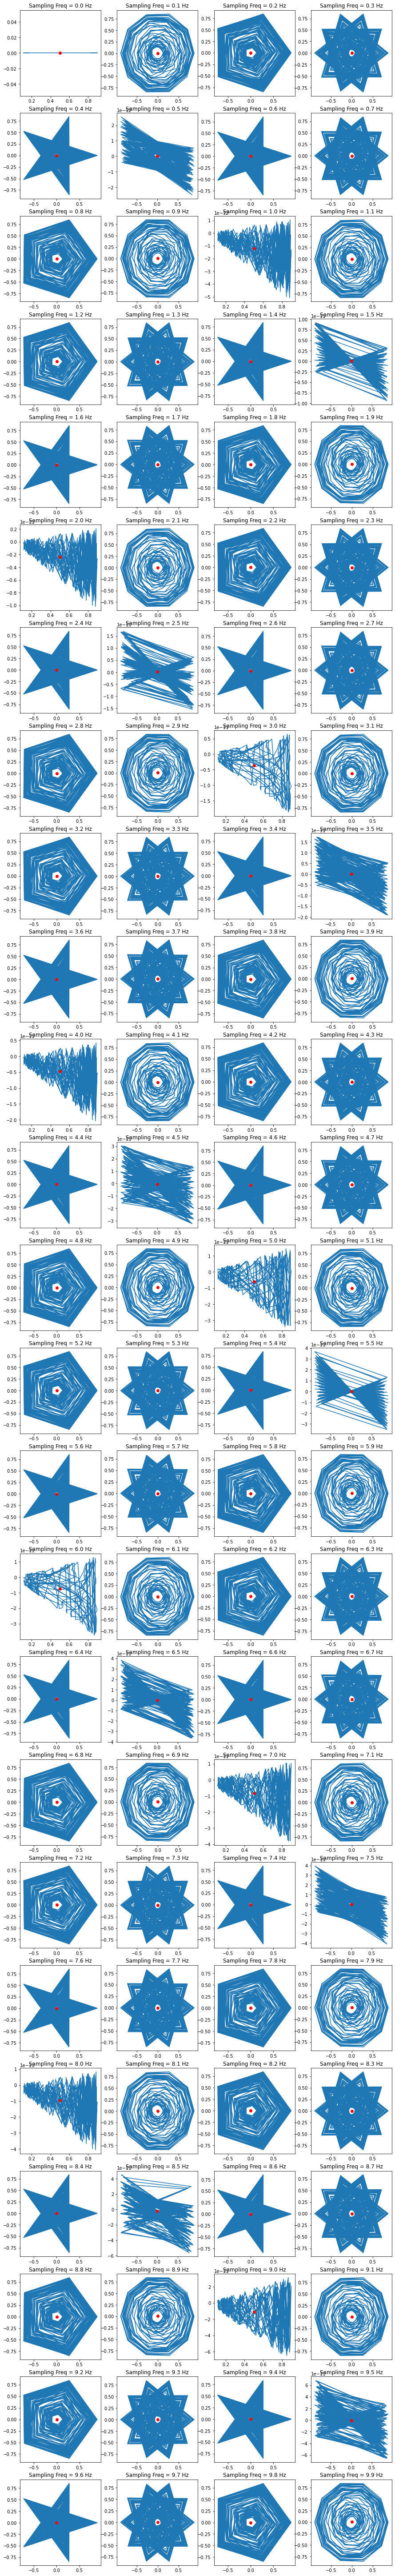

In [11]:
mean_list = []

plt.rcParams["figure.figsize"] = (15,110)
for l in range(len(r_cord)):
    plt.subplot(int(len(r_cord)/4)+1, 4, int(l+1))
    plt.plot(x_cord[l], y_cord[l])
    plt.plot(np.mean(x_cord[l]), np.mean(y_cord[l]), 'or' )
    plt.title("Sampling Freq = "+str(round(sf_list[l], 2))+" Hz")
    
    # Storing the COM for plotting later
    x_mean = np.sum(x_cord[l])
    mean_list.append(x_mean)
#plt.savefig('spooky.png')

In [21]:
# f = 3.0
# t = np.arange(0,2,0.001) 

# cos_wave = np.cos(2*np.pi*f*t)
# r_cord = []
# min_freq_range = 0.0
# max_freq_range = 10.0
# sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
# for sf in sf_list:
#     r_cord.append( [(cos_wave[i], t[i]*sf*2*np.pi) for i in range(len(t)) ] )
    
# temp=np.array(r_cord)
# temp.shape
#len(t)

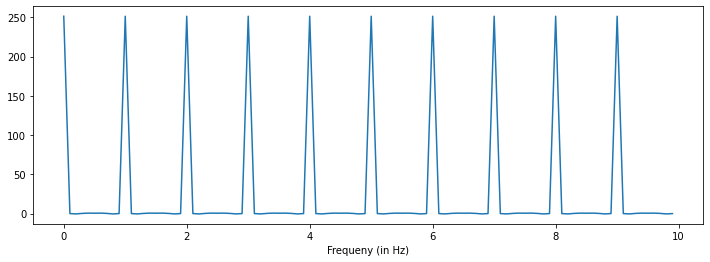

In [12]:
plt.rcParams["figure.figsize"] = (12,4)
plt.xlabel("Frequeny (in Hz)")
#plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
#sns.set()
plt.plot(sf_list[:100],mean_list[:100]);

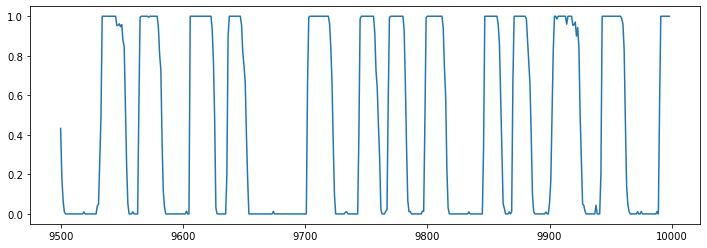

In [44]:
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(t,bush_pw);

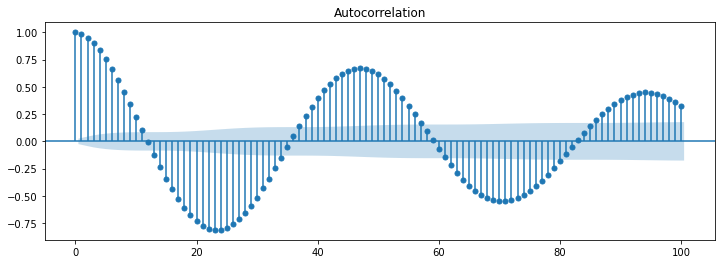

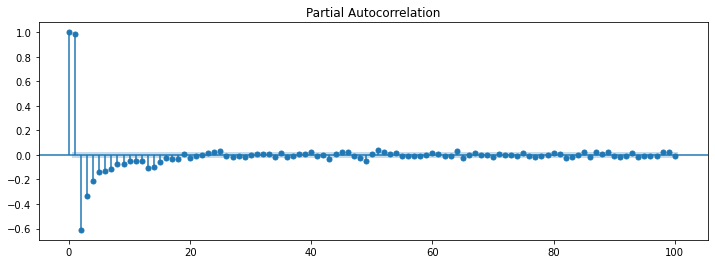

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm

krat_500_gens = krat_by_gen_exp2#[krat_by_gen_exp2['generation']>=9500]

t = list(krat_500_gens['generation'])

bush_pw = list(krat_500_gens['bush_pw_mean'])

sm.graphics.tsa.plot_acf(bush_pw, lags=100)
sm.graphics.tsa.plot_pacf(bush_pw, lags=100)
plt.show()

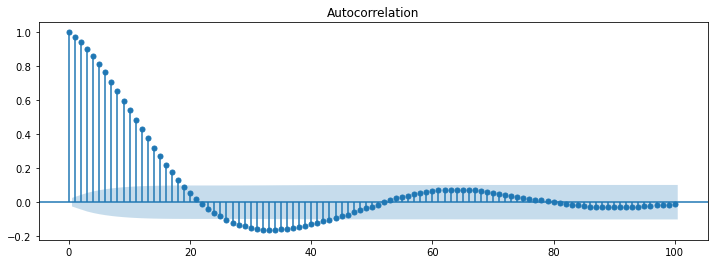

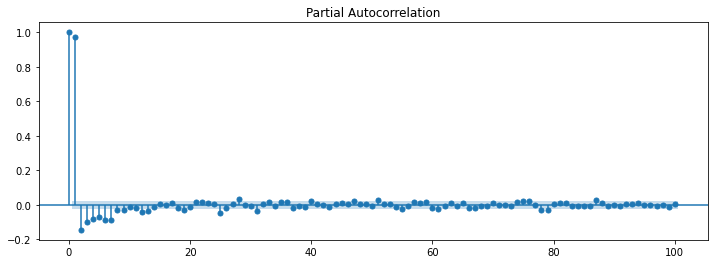

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm

krat_500_gens = krat_by_gen_exp3#[krat_by_gen_exp3['generation']>=9500]

t = list(krat_500_gens['generation'])

bush_pw = list(krat_500_gens['bush_pw_mean'])

sm.graphics.tsa.plot_acf(bush_pw, lags=100)
sm.graphics.tsa.plot_pacf(bush_pw, lags=100)
plt.show()

Snake: EXP2


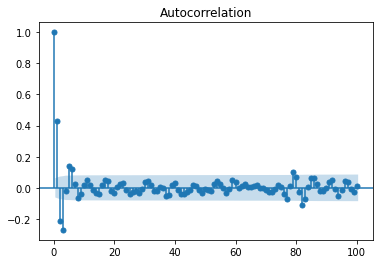

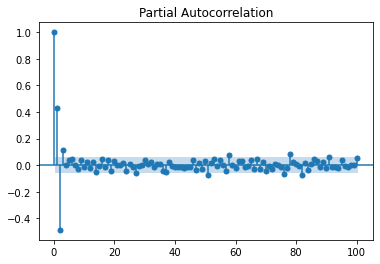

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm

snake_500_gens = snake_by_gen_exp2#[snake_by_gen_exp2['generation']>=1500]

t = list(snake_500_gens['generation'])

bush_pw = list(snake_500_gens['bush_pw_mean'])
print('Snake: EXP2')
sm.graphics.tsa.plot_acf(bush_pw, lags=100)
sm.graphics.tsa.plot_pacf(bush_pw, lags=100)
plt.show()

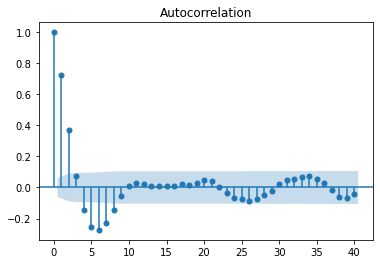

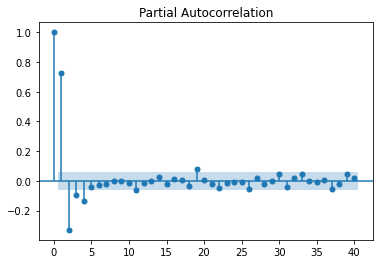

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm

snake_500_gens = snake_by_gen_exp3#[snake_by_gen_exp3['generation']>=1500]

t = list(snake_500_gens['generation'])

bush_pw = list(snake_500_gens['bush_pw_mean'])

sm.graphics.tsa.plot_acf(bush_pw, lags=40)
sm.graphics.tsa.plot_pacf(bush_pw, lags=40)
plt.show()

In [34]:
krat_snake_by_gen = pd.merge(krat_by_gen, snake_by_gen, how="left", on=["generation", "generation"])
krat_snake_by_gen.head()

file_name_x experiment_x  sim_number_x org_x  \
0  experiment_1_sim_0_krat_info.csv  experiment1             0  krat   
1  experiment_1_sim_0_krat_info.csv  experiment1             0  krat   
2  experiment_1_sim_0_krat_info.csv  experiment1             0  krat   
3  experiment_1_sim_0_krat_info.csv  experiment1             0  krat   
4  experiment_1_sim_0_krat_info.csv  experiment1             0  krat   

                           sim_id_x  generation  cycle_x  pop_count_x  \
0  078a550708c94ad589f54acb02b8b55a        3999   200000          448   
1  078a550708c94ad589f54acb02b8b55a        4000   200050          455   
2  078a550708c94ad589f54acb02b8b55a        4001   200100          455   
3  078a550708c94ad589f54acb02b8b55a        4002   200150          102   
4  078a550708c94ad589f54acb02b8b55a        4003   200200          112   

   bush_pw_mean_x  bush_pw_std_x  ...  movements_mean_y  movements_std_y  \
0        0.000000       0.000000  ...               NaN              NaN   
1        0.000000       0.000000  ...               NaN              NaN   
2        0.000000       0.000000  ...               NaN              NaN   
3        0.029412       0.169792  ...               NaN              NaN   
4        0.017857       0.133027  ...               NaN              NaN   

   movements_sum_y  other_in_cell_mean_y  other_in_cell_std_y  \
0              NaN                   NaN                  NaN   
1              NaN                   NaN                  NaN   
2              NaN                   NaN                  NaN   
3              NaN                   NaN                  NaN   
4              NaN                   NaN                  NaN   

   other_in_cell_sum_y  owls_in_cell_mean_y  owls_in_cell_std_y  \
0                  NaN                  NaN                 NaN   
1                  NaN                  NaN                 NaN   
2                  NaN                  NaN                 NaN   
3                  NaN                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

   owls_in_cell_sum_y  bush_pw_ma_y  
0                 NaN           NaN  
1                 NaN           NaN  
2                 NaN           NaN  
3                 NaN           NaN  
4                 NaN           NaN  

[5 rows x 45 columns]

In [14]:
# result = pd.concat([df1, s1], axis=1)
# test_result = grangercausalitytests(, maxlag=maxlag, verbose=False)


file_name   experiment  sim_number   org  \
0  experiment_1_sim_0_krat_info.csv  experiment1           0  krat   
1  experiment_1_sim_0_krat_info.csv  experiment1           0  krat   
2  experiment_1_sim_0_krat_info.csv  experiment1           0  krat   
3  experiment_1_sim_0_krat_info.csv  experiment1           0  krat   
4  experiment_1_sim_0_krat_info.csv  experiment1           0  krat   

                             sim_id  generation   cycle  pop_count  \
0  6d966d426f394176923d8fcb6ec78e55        3999  200000        291   
1  6d966d426f394176923d8fcb6ec78e55        4000  200050        292   
2  6d966d426f394176923d8fcb6ec78e55        4001  200100        294   
3  6d966d426f394176923d8fcb6ec78e55        4002  200150        258   
4  6d966d426f394176923d8fcb6ec78e55        4003  200200        288   

   bush_pw_mean  bush_pw_std  ...  energy_score_sum  movements_mean  \
0           1.0          0.0  ...             71295       48.776632   
1           1.0          0.0  ...             71540       48.763699   
2           1.0          0.0  ...             72030       48.751701   
3           1.0          0.0  ...             63210       48.779070   
4           1.0          0.0  ...             70560       48.791667   

   movements_std  movements_sum  other_in_cell_mean  other_in_cell_std  \
0       0.456679          14194                 0.0                0.0   
1       0.485866          14239                 0.0                0.0   
2       0.498716          14333                 0.0                0.0   
3       0.451573          12585                 0.0                0.0   
4       0.447603          14052                 0.0                0.0   

   other_in_cell_sum  owls_in_cell_mean  owls_in_cell_std  owls_in_cell_sum  
0                  0                0.0               0.0                 0  
1                  0                0.0               0.0                 0  
2                  0                0.0               0.0                 0  
3                  0                0.0               0.0                 0  
4                  0                0.0               0.0                 0  

[5 rows x 22 columns]

In [23]:
gc_test_data_sim_exp1 = pd.pivot_table(sim, values='bush_pw_mean', index=['cycle'],
                    columns=['org'], aggfunc=np.sum)
gc_test_data_sim_exp1 = gc_test_data_sim_exp1.reset_index()
maxlag = 20
test_result = grangercausalitytests(gc_test_data_sim_exp1[['krat', 'snake']], maxlag=maxlag)
#test_result = grangercausalitytests(gc_test_data_sim_exp1[['snake','krat']], maxlag=maxlag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7437.2034, p=0.0000  , df_denom=5996, df_num=1
ssr based chi2 test:   chi2=7440.9245, p=0.0000  , df=1
likelihood ratio test: chi2=4839.0149, p=0.0000  , df=1
parameter F test:         F=7437.2034, p=0.0000  , df_denom=5996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=862.7740, p=0.0000  , df_denom=5993, df_num=2
ssr based chi2 test:   chi2=1726.9876, p=0.0000  , df=2
likelihood ratio test: chi2=1517.6988, p=0.0000  , df=2
parameter F test:         F=862.7740, p=0.0000  , df_denom=5993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=379.2503, p=0.0000  , df_denom=5990, df_num=3
ssr based chi2 test:   chi2=1139.0804, p=0.0000  , df=3
likelihood ratio test: chi2=1042.9042, p=0.0000  , df=3
parameter F test:         F=379.2503, p=0.0000  , df_denom=5990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=244.88

In [25]:
gc_test_data_sim_exp3 = pd.pivot_table(sim_exp3, values='bush_pw_mean', index=['cycle'],
                    columns=['org'], aggfunc=np.sum)
gc_test_data_sim_exp1 = gc_test_data_sim_exp1.reset_index()
maxlag = 20
#test_result = grangercausalitytests(gc_test_data_sim_exp1[['krat', 'snake']], maxlag=maxlag)
test_result = grangercausalitytests(gc_test_data_sim_exp1[['snake','krat']], maxlag=maxlag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=691.9029, p=0.0000  , df_denom=5996, df_num=1
ssr based chi2 test:   chi2=692.2491, p=0.0000  , df=1
likelihood ratio test: chi2=655.1375, p=0.0000  , df=1
parameter F test:         F=691.9029, p=0.0000  , df_denom=5996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=461.6062, p=0.0000  , df_denom=5993, df_num=2
ssr based chi2 test:   chi2=923.9826, p=0.0000  , df=2
likelihood ratio test: chi2=859.3704, p=0.0000  , df=2
parameter F test:         F=461.6062, p=0.0000  , df_denom=5993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=385.7281, p=0.0000  , df_denom=5990, df_num=3
ssr based chi2 test:   chi2=1158.5367, p=0.0000  , df=3
likelihood ratio test: chi2=1059.2326, p=0.0000  , df=3
parameter F test:         F=385.7281, p=0.0000  , df_denom=5990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=378.1595, p=

In [19]:
### Dicky Fuller Stationarity test ######
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(series):
    result=adfuller(series)
    print('statistic {}'.format(result[0]))
    print('p value {}'.format(float(result[1])))

In [20]:
snake_500_gens = snake_by_gen#[snake_by_gen_exp3['generation']>=1500]

t = list(snake_500_gens['generation'])

bush_pw = list(snake_500_gens['bush_pw_mean'])
perform_adf_test(bush_pw)

statistic -21.202166074998548
p value 0.0


In [27]:
krat_500_gens = krat_by_gen#[krat_by_gen_exp3['generation']>=9500]

t = list(krat_500_gens['generation'])

bush_pw = list(krat_500_gens['bush_pw_mean'])
perform_adf_test(bush_pw)

statistic -12.627373422854967
p value 1.5311537172647696e-23


In [4]:
####################
## Derivative aprox
####################

def aprox_derv_forward(data,step_size):
    derv = []
    for i in range(len(data)-step_size):
        val = round(((data[i+step_size]-data[i])/step_size),2)
        derv.append(val)
    return derv

def aprox_derv_backward(data,step_size):
    derv = []
    for i in range(len(data)):
        val = (data[i]-data[i-step_size])/step_size
        derv.append(val)
    return derv

def aprox_derv_central(data,step_size_forward,step_size_backward):
    derv = []
    if step_size_backward<0:
        raise ValueError()
    for i in range(len(data)):
        try:
            if i-step_size_backward<0:
                val = float("NAN")
            else:
                val = (data[i+step_size_forward]-data[i-step_size_backward])/(step_size_forward+step_size_backward)
        except IndexError:
            val = float("NAN")
        derv.append(val)
    return derv

def aprox_derv_forward_v2(data,step_size):
    return np.diff(data,1)/step_size

In [5]:
def savitzky_golay(y_list, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial
    
    try:
        y = np.asarray(y_list)
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [8]:
def x_squared(x):
    return x**2

def two_x(x):
    return x*2
x = [i for i in range(0,10)]
a = [x_squared(i) for i in range(0,10)]
actual = [two_x(i) for i in range(0,10)]
ax_dx = aprox_derv_central(a,1,1)
ax_dx2 = aprox_derv_central(ax_dx,1,1)
ax_dx_v2 = aprox_derv_forward_v2(a,2)
data_tuples = list(zip(x,a,actual,ax_dx,ax_dx2))
df = pd.DataFrame(data_tuples, columns=['x','a','actual','ax_dx','ax_dx2'])
#print(x_temp)
df.head(10)

x   a  actual  ax_dx  ax_dx2
0  0   0       0    NaN     NaN
1  1   1       2    2.0     NaN
2  2   4       4    4.0     2.0
3  3   9       6    6.0     2.0
4  4  16       8    8.0     2.0
5  5  25      10   10.0     2.0
6  6  36      12   12.0     2.0
7  7  49      14   14.0     2.0
8  8  64      16   16.0     NaN
9  9  81      18    NaN     NaN

<AxesSubplot:xlabel='x', ylabel='a'>

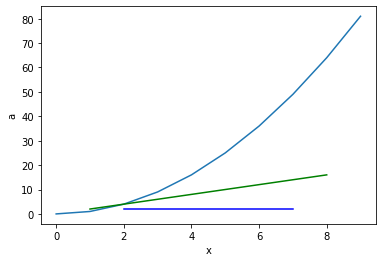

In [35]:
sns.lineplot(data=df, x="x", y="a")
sns.lineplot(data=df, x="x", y="ax_dx",color='g')
sns.lineplot(data=df, x="x", y="ax_dx2",color='b')

In [29]:
#### Backward ######
step_size = 1
x = [i for i in range(0,10)]
a = [x_squared(i) for i in range(0,10)]
ax_dx = aprox_derv_backward(a,step_size)
ax_dx2 = aprox_derv_backward(ax_dx,step_size)
data_tuples = list(zip(x,a,ax_dx,ax_dx2))
df = pd.DataFrame(data_tuples, columns=['x','a','ax_dx','ax_dx2'])
#print(x_temp)
#df.head(10)

In [6]:
step_size=1
snake_gen_temp = snake_by_gen[snake_by_gen['generation']>=1500]
x = list(snake_gen_temp['generation'])
y = list(snake_gen_temp["bush_pw_mean"])
yx_dx = aprox_derv_central(y,step_size_forward=step_size,step_size_backward=step_size)
yx_dx2 = aprox_derv_central(yx_dx,step_size_forward=step_size,step_size_backward=step_size)
data_tuples = list(zip(x,y,yx_dx,yx_dx2))
df = pd.DataFrame(data_tuples, columns=['x','y','yx_dx','yx_dx2'])

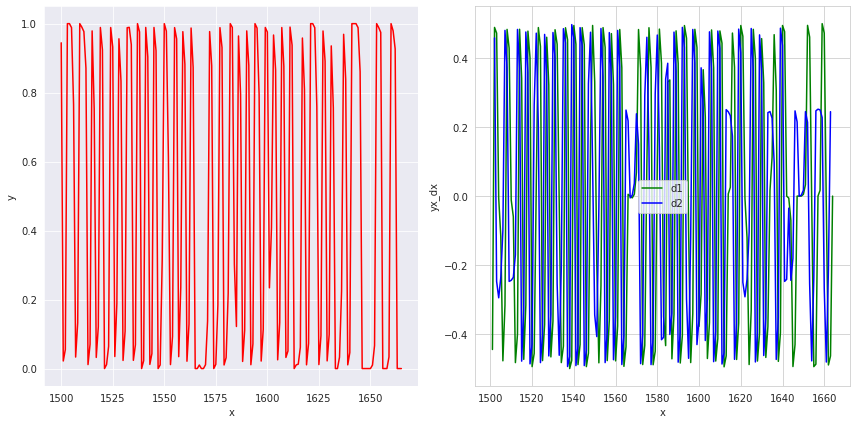

In [8]:
#sns.lineplot(data=df, x="x", y="y",color='r')
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=df, x="x", y="y",color='r')

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.lineplot(data=df, x="x", y="yx_dx",color='g')
    sns.lineplot(data=df, x="x", y="yx_dx2",color='b')
    plt.legend(labels=["d1","d2"])

f.tight_layout()

<AxesSubplot:xlabel='x', ylabel='yx_dx'>

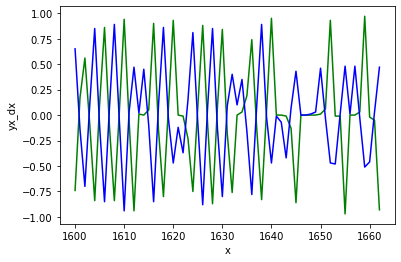

In [8]:
sns.lineplot(data=df, x="x", y="yx_dx",color='g')
sns.lineplot(data=df, x="x", y="yx_dx2",color='b')

In [6]:
def inflection_point_classifaction(df,sensitivity=0.1):
    classifacation = []
    max_id=df['x'].idxmax()
    for index, row in df.iterrows():
        try:
            no_key_error=bool((index+1)<=max_id)
            index_not_zero=bool(index!=0)
            if no_key_error and index_not_zero:
#                 sig_max_check=(abs(df.loc[int(index+step_size), 'yx_dx'])+abs(df.loc[int(index-step_size), 'yx_dx']))/(step_size*2+1)>sensitivity
#                 sig_min_check=(abs(df.loc[int(index+step_size), 'yx_dx'])+abs(df.loc[int(index-step_size), 'yx_dx']))/(step_size*2+1)>sensitivity
                sig_max_check=abs(df.loc[int(index+1), 'yx_dx2'])>sensitivity
                sig_min_check=abs(df.loc[int(index+1), 'yx_dx2'])>sensitivity
                if round(row['yx_dx'],2)==0.0 and round(row['yx_dx2'],2)>0.0 and sig_min_check:
                    val='min'
                elif round(row['yx_dx'],2)==0.0 and round(row['yx_dx2'],2)<0.0 and sig_max_check:
                    val='max'
                elif df.loc[int(index+1), 'yx_dx']>0 and df.loc[int(index), 'yx_dx']<0 and sig_min_check:
                    val='min'
                elif df.loc[int(index+1), 'yx_dx']<0 and df.loc[int(index), 'yx_dx']>0 and sig_max_check:
                    val='max'
                else:
                    val=float('NAN')
            else:
                val=float('NAN')
        except KeyError:
            val=float('NAN')
        classifacation.append(val)
    return classifacation

def plotable_points(df):
    dot_class = []
    for index, row in df.iterrows():
        if row['point_classifacation'] in ['min','max']:
            val=row['y']
        else:
            val=float('NAN')
        dot_class.append(val)
    return dot_class

<IPython.core.display.Javascript object>


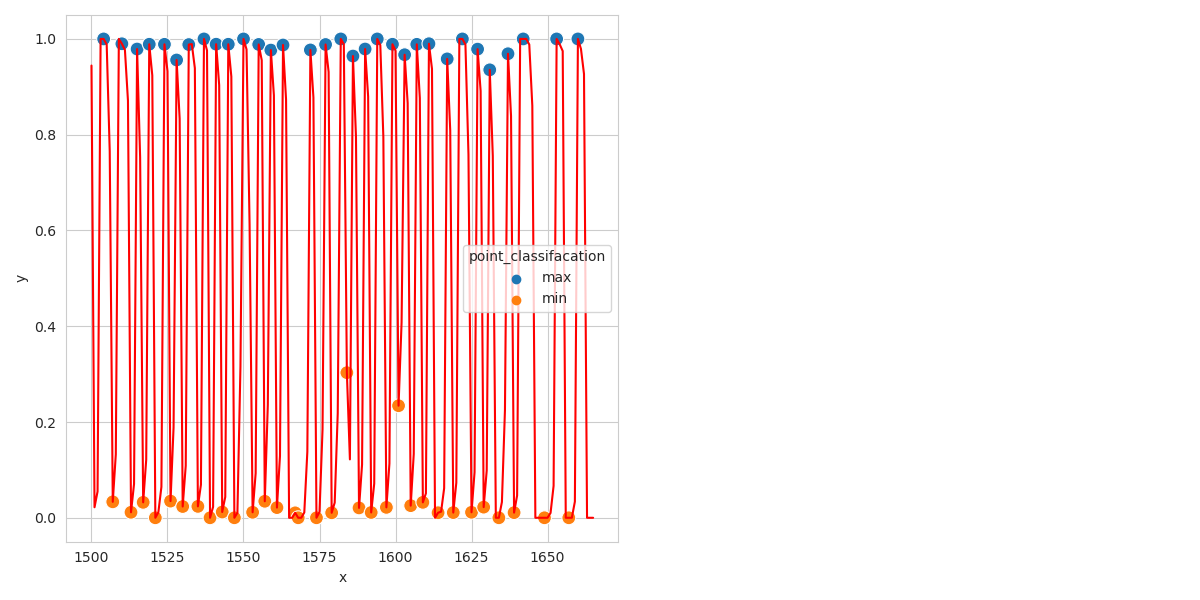

In [7]:
%matplotlib notebook
### Snakes ####

step_size=1
sensitivity=0.01
#np.over_cursers
snake_gen_temp = snake_by_gen[snake_by_gen['generation']>=1500]
#snake_gen_temp = snake_by_gen_exp3[snake_by_gen_exp3['generation']>=1600]
x = list(snake_gen_temp['generation'])
y = list(snake_gen_temp["bush_pw_mean"])
yx_dx = aprox_derv_central(y,step_size_forward=1,step_size_backward=step_size)
smooth_yx_dx = savitzky_golay(y_list=yx_dx, window_size=3, order=1, deriv=0, rate=1)
yx_dx2 = aprox_derv_central(yx_dx,step_size_forward=step_size,step_size_backward=step_size)
smooth_yx_dx2 = savitzky_golay(y_list=yx_dx2, window_size=3, order=1, deriv=0, rate=1)
#data_tuples = list(zip(x,y,yx_dx,smooth_yx_dx,yx_dx2))
data_tuples = list(zip(x,y,smooth_yx_dx,smooth_yx_dx2))
df_snake = pd.DataFrame(data_tuples, columns=['x','y','yx_dx','yx_dx2'])

classifacation = inflection_point_classifaction(df=df_snake,sensitivity=sensitivity)
df_snake['point_classifacation'] = classifacation
dot_class = plotable_points(df=df_snake)
df_snake['dot_class'] = dot_class

f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=df_snake, x="x", y="y",color='r')
    sns.scatterplot(data=df_snake, x="x", y="dot_class", hue="point_classifacation",s=100)
    #ax.set(xlim=(1500, 1510))

# with sns.axes_style("whitegrid"):
#     ax = f.add_subplot(gs[0, 1])
#     #sns.lineplot(data=df_snake, x="x", y="yx_dx",color='g')
#     sns.lineplot(data=df_snake, x="x", y="yx_dx2",color='b')
#     #ax.set(xlim=(1500, 1510))
# #     sns.lineplot(data=df_snake, x="x", y="yx_dx2",color='b')
# #     plt.legend(labels=["d1","d2"])
mplcursors.cursor(hover=True)
f.tight_layout()

In [8]:
snake_exp1_optima = [(1504,1.00,'max'),
					 (1507,0.033,'min'),
					 (1510,0.990,'max'),
					 (1513,0.011,'min'),
					 (1515,0.977,'max'),
					 (1517,0.032,'min'),
					 (1519,0.989,'max'),
					 (1521,0.000,'min'),
					 (1524,0.989,'max'),
					 (1526,0.035,'min'),
					 (1528,0.956,'max'),
					 (1530,0.024,'min'),
					 (1532,0.988,'max'),
					 (1535,0.024,'min'),
					 (1537,1.000,'max'),
					 (1539,0.000,'min'),
					 (1541,0.989,'max'),
					 (1543,0.012,'min'),
					 (1545,0.989,'max'),
					 (1547,0.000,'min'),
					 (1550,1.000,'max'),
					 (1553,0.011,'min'),
					 (1555,0.989,'max'),
					 (1557,0.034,'min'),
					 (1559,0.977,'max'),
					 (1561,0.021,'min'),
					 (1563,0.987,'max'),
					 (1565,0.000,'min'),
					 (1572,0.977,'max'),
					 (1574,0.000,'min'),
					 (1572,0.977,'max'),
					 (1574,0.000,'min'),
					 (1577,0.988,'max'),
					 (1579,0.010,'min'),
					 (1582,0.994,'max'),
					 (1585,0.122,'min'),
					 (1586,0.964,'max'),
					 (1588,0.021,'min'),
					 (1590,0.979,'max'),
					 (1592,0.011,'min'),
					 (1594,1.000,'max'),
					 (1597,0.022,'min'),
					 (1599,0.989,'max'),
					 (1601,0.234,'min'),
					 (1603,0.967,'max'),
					 (1605,0.025,'min'),
					 (1607,0.987,'max'),
					 (1609,0.032,'min'),
					 (1611,0.990,'max'),
					 (1613,0.004,'min'),
					 (1617,0.958,'max'),
					 (1619,0.011,'min'),
					 (1622,1.000,'max'),
					 (1625,0.011,'min'),
					 (1627,0.979,'max'),
					 (1629,0.023,'min'),
					 (1631,0.935,'max'),
					 (1634,0.000,'min'),
					 (1637,0.964,'max'),
					 (1639,0.011,'min'),
					 (1641,1.000,'max'),
					 (1649,0.000,'min'),
					 (1653,1.000,'max'),
					 (1657,0.000,'min'),
					 (1660,0.996,'max')]

In [15]:
df_snake.head()

x         y     yx_dx    yx_dx2 point_classifacation  dot_class
0  1500  0.944444       NaN       NaN                  NaN        NaN
1  1501  0.021978       NaN       NaN                  NaN        NaN
2  1502  0.054945  0.172263       NaN                  NaN        NaN
3  1503  1.000000  0.318597 -0.027882                  NaN        NaN
4  1504  1.000000  0.116499 -0.259401                  max        1.0

In [12]:
def min_max_flip_by_gen(df):
    min_max = []
    cur_val=None
    #cur_val = 0 "min"
    #cur_val = 1 "max"
    #cur_val = None 'not defined yet'
    for index, row in df.iterrows():
        if row['point_classifacation'] == 'min':
            cur_val=0
        elif row['point_classifacation'] == 'max':
            cur_val=1
        else:
            cur_val=cur_val
        min_max.append(cur_val)
    return min_max

def min_max_filter(df):
    filter_vals = []
    max_id=df['x'].idxmax()
    for index, row in df.iterrows():
        try:
            if df.loc[int(index+1), 'point_classifacation'] in ['min','max']:
                val=1
            else:
                val=0
        except KeyError:
            val=0
        filter_vals.append(val)
    return filter_vals
            

In [9]:
df_snake['min_max_flip'] = min_max_flip_by_gen(df=df_snake)

In [10]:
df_snake['time_as_max_min'] = df_snake.groupby((df_snake['min_max_flip'] != df_snake['min_max_flip'].shift(1)).cumsum()).cumcount()+1

In [13]:
df_snake['min_max_filter'] = min_max_filter(df=df_snake)

In [14]:
df_snake.head(10)

x         y     yx_dx    yx_dx2 point_classifacation  dot_class  \
0  1500  0.944444       NaN       NaN                  NaN        NaN   
1  1501  0.021978       NaN       NaN                  NaN        NaN   
2  1502  0.054945  0.172263       NaN                  NaN        NaN   
3  1503  1.000000  0.318597 -0.027882                  NaN        NaN   
4  1504  1.000000  0.116499 -0.259401                  max   1.000000   
5  1505  0.988506 -0.200206 -0.210136                  NaN        NaN   
6  1506  0.765432 -0.303774  0.048319                  NaN        NaN   
7  1507  0.033333 -0.103568  0.251148                  min   0.033333   
8  1508  0.132530  0.198522  0.201871                  NaN        NaN   
9  1509  1.000000  0.300175 -0.039640                  NaN        NaN   

   min_max_flip  time_as_max_min  min_max_filter  
0           NaN                1               0  
1           NaN                1               0  
2           NaN                1               0  
3           NaN                1               1  
4           1.0                1               0  
5           1.0                2               0  
6           1.0                3               1  
7           0.0                1               0  
8           0.0                2               0  
9           0.0                3               1

In [15]:
df_snake[df_snake['min_max_filter']==1]['time_as_max_min'].mean()

2.46875

In [55]:
df_snake[df_snake['x']>=1500].head(10)

x         y     yx_dx    yx_dx2 point_classifacation  dot_class
100  1500  0.944444 -0.483329 -0.440809                  NaN   0.944444
101  1501  0.021978 -0.444750  0.486170                  min   0.021978
102  1502  0.054945  0.489011  0.458639                  NaN   0.054945
103  1503  1.000000  0.472527 -0.247379                  NaN   1.000000
104  1504  1.000000 -0.005747 -0.294906                  NaN   1.000000
105  1505  0.988506 -0.117284 -0.235920                  NaN   0.988506
106  1506  0.765432 -0.477586 -0.099584                  NaN   0.765432
107  1507  0.033333 -0.316451  0.480460                  min   0.033333
108  1508  0.132530  0.483333  0.372568                  NaN   0.132530
109  1509  1.000000  0.428684 -0.247414                  max   1.000000

<IPython.core.display.Javascript object>


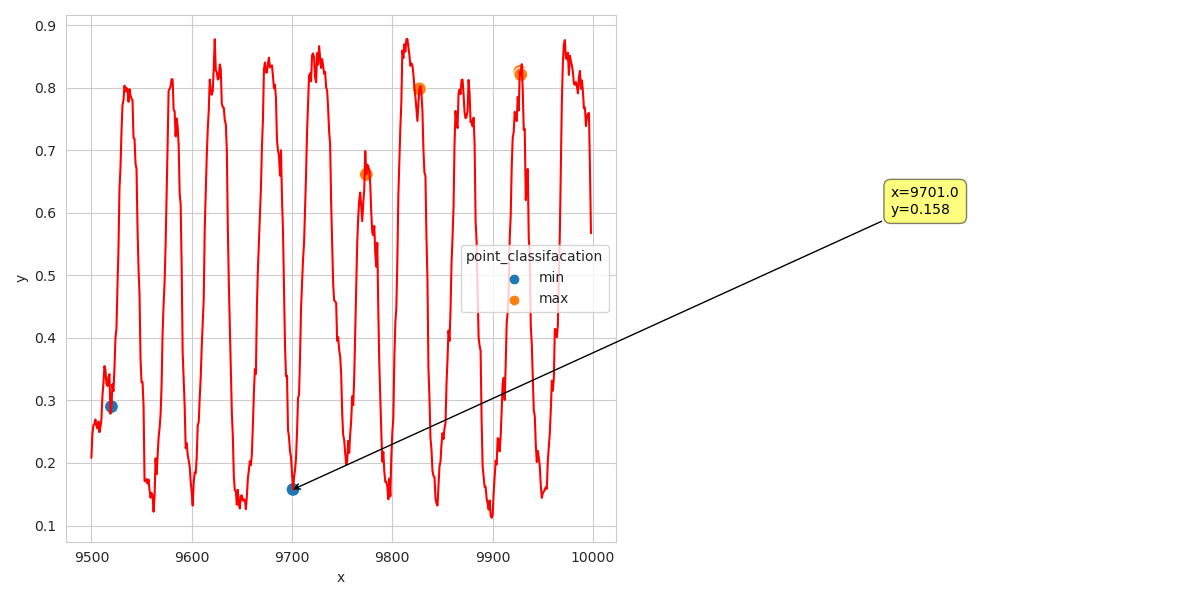

In [18]:
%matplotlib notebook

step_size=1
sensitivity=.01
#krat_by_gen_temp = krat_by_gen[krat_by_gen['generation']>=9500]
krat_by_gen_temp = krat_by_gen_exp2[krat_by_gen_exp2['generation']>=9500]
x = list(krat_by_gen_temp['generation'])
y = list(krat_by_gen_temp["bush_pw_mean"])
# smooth_y = savitzky_golay(y_list=y, window_size=7, order=1, deriv=0, rate=1)
# yx_dx = aprox_derv_central(smooth_y,step_size_forward=1,step_size_backward=step_size)
# smooth_yx_dx = savitzky_golay(y_list=yx_dx, window_size=7, order=1, deriv=0, rate=1)
# yx_dx2 = aprox_derv_central(smooth_yx_dx,step_size_forward=step_size,step_size_backward=step_size)
# smooth_yx_dx2 = savitzky_golay(y_list=yx_dx2, window_size=7, order=1, deriv=0, rate=1)
yx_dx = aprox_derv_central(y,step_size_forward=1,step_size_backward=step_size)
smooth_yx_dx = savitzky_golay(y_list=yx_dx, window_size=5, order=1, deriv=0, rate=1)
yx_dx2 = aprox_derv_central(yx_dx,step_size_forward=step_size,step_size_backward=step_size)
smooth_yx_dx2 = savitzky_golay(y_list=yx_dx2, window_size=5, order=1, deriv=0, rate=1)
#data_tuples = list(zip(x,y,yx_dx,smooth_yx_dx,yx_dx2))
data_tuples = list(zip(x,y,smooth_yx_dx,smooth_yx_dx2))
df_krat = pd.DataFrame(data_tuples, columns=['x','y','yx_dx','yx_dx2'])

classifacation = inflection_point_classifaction(df=df_krat,sensitivity=sensitivity)
df_krat['point_classifacation'] = classifacation
dot_class = plotable_points(df=df_krat)
df_krat['dot_class'] = dot_class


f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=df_krat, x="x", y="y",color='r')
    sns.scatterplot(data=df_krat, x="x", y="dot_class", hue="point_classifacation",s=100)

# with sns.axes_style("whitegrid"):
#     ax = f.add_subplot(gs[0, 1])
#     sns.lineplot(data=df_krat, x="x", y="yx_dx",color='g')
#     sns.lineplot(data=df_krat, x="x", y="yx_dx2",color='b')
#     plt.legend(labels=["d1","d2"])
mplcursors.cursor(hover=True)
f.tight_layout()

In [19]:
krat_actual=[(9535,0.800,'max'),
             (9562,0.122,'min'),
             (9580,0.814,'max'),
             (9601,0.132,'min'),
             (9623,0.878,'max'),
             (9648,0.127,'min'),
             (9677,0.848,'max'),
             (9701,0.158,'min'),
             (9727,0.866,'max'),
             (9754,0.197,'min'),
             (9773,0.691,'max'),
             (9796,0.142,'min'),
             (9815,0.878,'max'),
             (9845,0.132,'min'),
             (9870,0.813,'max'),
             (9899,0.112,'min'),
             (9929,0.837,'max'),
             (9949,0.144,'min'),
             (9972,0.876,'max')]

<IPython.core.display.Javascript object>


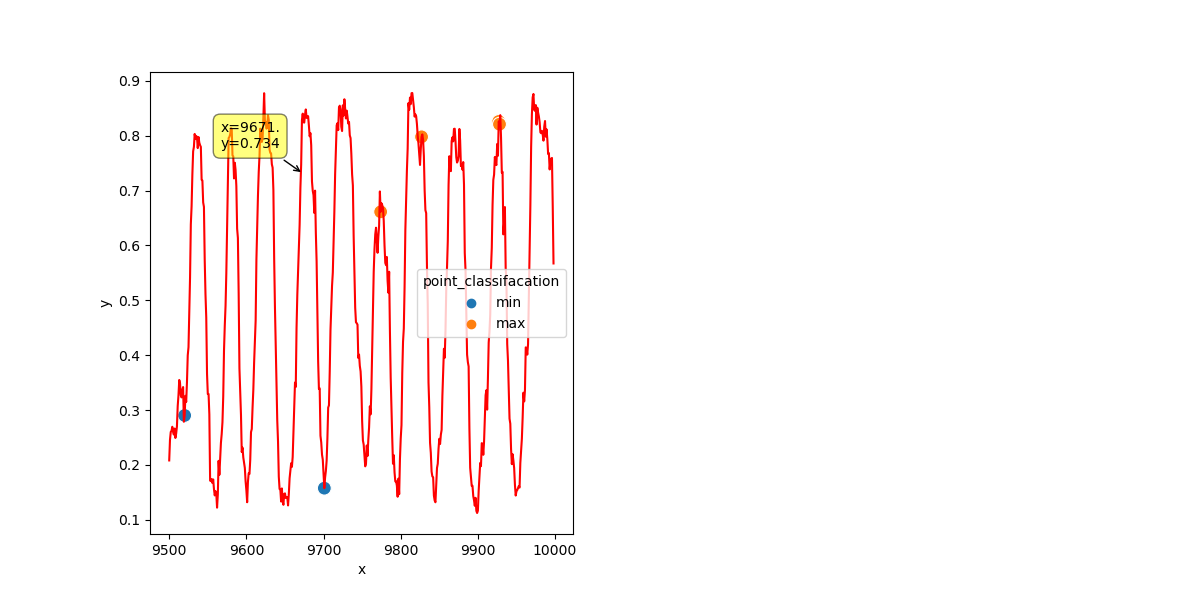

In [62]:
%matplotlib notebook
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)



ax = f.add_subplot(gs[0, 0])
sns.lineplot(data=df_krat, x="x", y="y",color='r')
sns.scatterplot(data=df_krat, x="x", y="dot_class", hue="point_classifacation",s=100)
sns.axes_style("whitegrid")

mplcursors.cursor(hover=True)

In [ ]:
# Check the moving average
# Calculate inferential method
# Check accuracy and percision of classifacation points
# Check accuracy and percision of and baseline difference of final metric
# python linter
# black autoformatter